In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[03/17/25 22:17:01] INFO     Resolved project path as:                                              ]8;id=567206;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=135486;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/17/25 22:17:01] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=886144;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=28208;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[03/17/25 22:17:02] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=140195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=2792;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=98126;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=359471;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=538670;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=818423;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=826583;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=784764;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/17/25 22:17:02] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=731136;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=156605;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[03/17/25 22:17:03] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=104738;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=546404;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=462180;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=410568;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=677638;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=706394;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### models:

In [19]:
info_save_all_exp1 = catalog.load('info_save_all_sin_eda') # prueba 1, experimento 1, sin eda
info_save_all_exp_c2 = catalog.load('info_save_all_sin_eda_v2')# prueba 2, experimento 2, sin eda

[01/30/25 20:16:17] INFO     Loading data from 'info_save_all_sin_eda_v2' (PickleDataSet)...    ]8;id=698224;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=823411;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [20]:
info_save_all_exp2 = info_save_all_exp_c2.copy()

Añadiendo experimento 1
Experimento 1: 0
Experimento 1: 1
Experimento 1: 2
Experimento 1: 3
Experimento 1: 4
Experimento 1: 5
Experimento 1: 6
Experimento 1: 7
Experimento 1: 8
Experimento 1: 9
Experimento 1: 10
Experimento 1: 11
Añadiendo experimento 2
Experimento 2: 0 Identificado como:  12
Cambio de identificacion:
Run1 : Run13
MLP_0 : MLP_12
----
Experimento 2: 1 Identificado como:  13
Cambio de identificacion:
Run2 : Run14
xgboost_1 : xgboost_13
----
Experimento 2: 2 Identificado como:  14
Cambio de identificacion:
Run3 : Run15
random_forest_2 : random_forest_14
----
Experimento 2: 3 Identificado como:  15
Cambio de identificacion:
Run4 : Run16
MLP_3 : MLP_15
----
Experimento 2: 4 Identificado como:  16
Cambio de identificacion:
Run5 : Run17
xgboost_4 : xgboost_16
----
Experimento 2: 5 Identificado como:  17
Cambio de identificacion:
Run6 : Run18
random_forest_5 : random_forest_17
----
Experimento 2: 6 Identificado como:  18
Cambio de identificacion:
Run7 : Run19
MLP_6 : MLP_18
--

[01/30/25 20:26:11] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=802097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=227237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=567416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=737432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

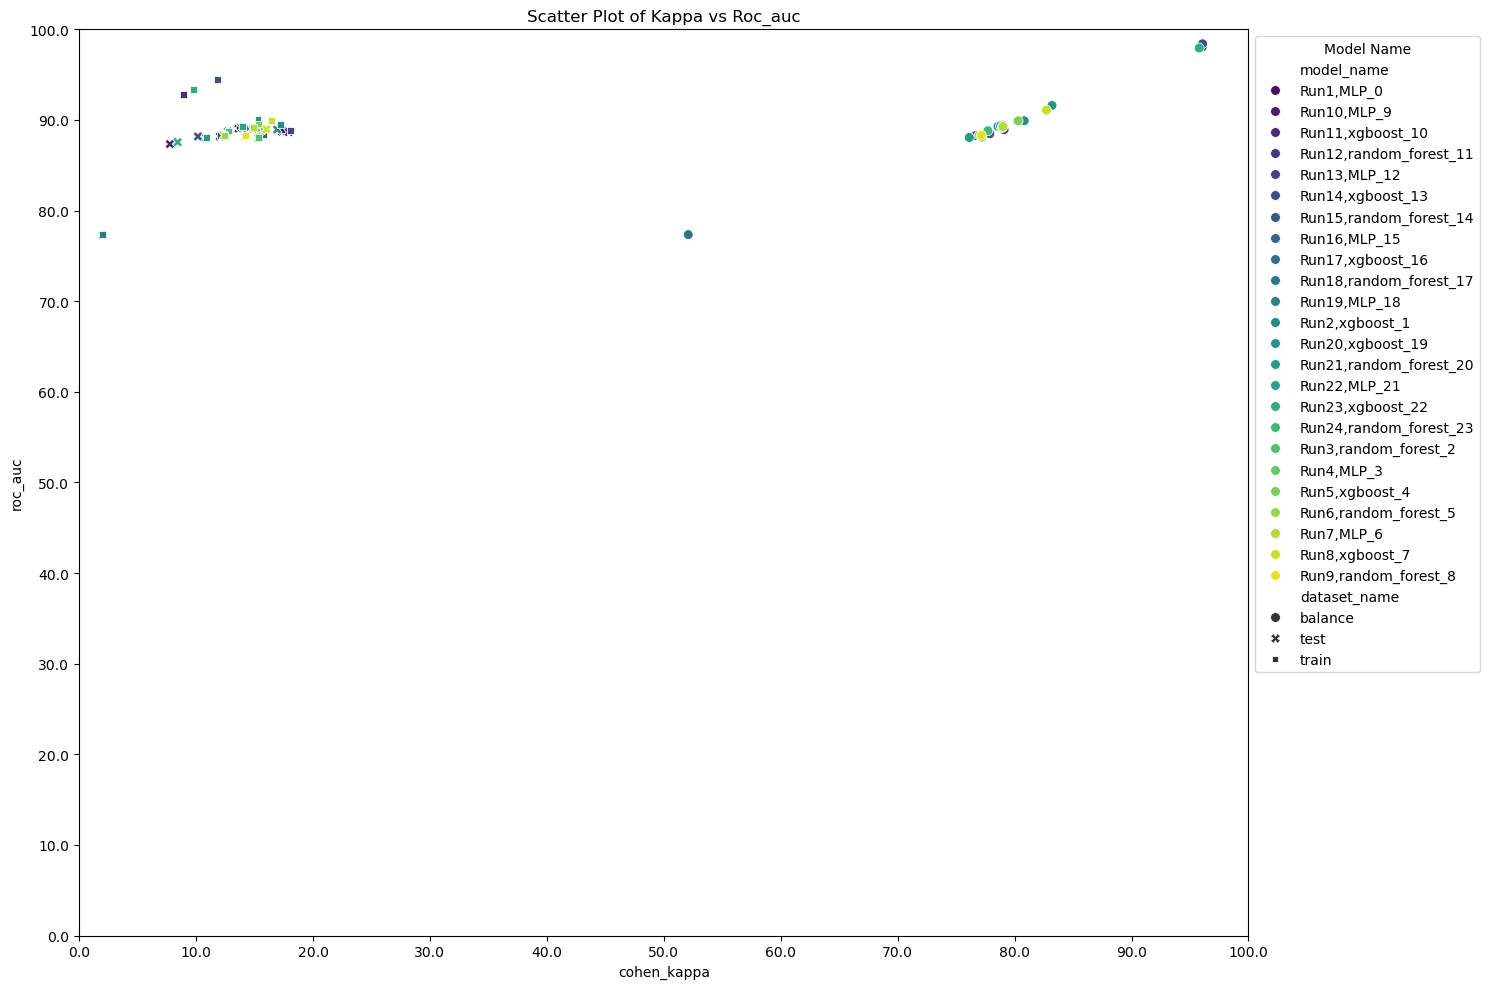

[01/30/25 20:26:12] INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=847499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=839638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

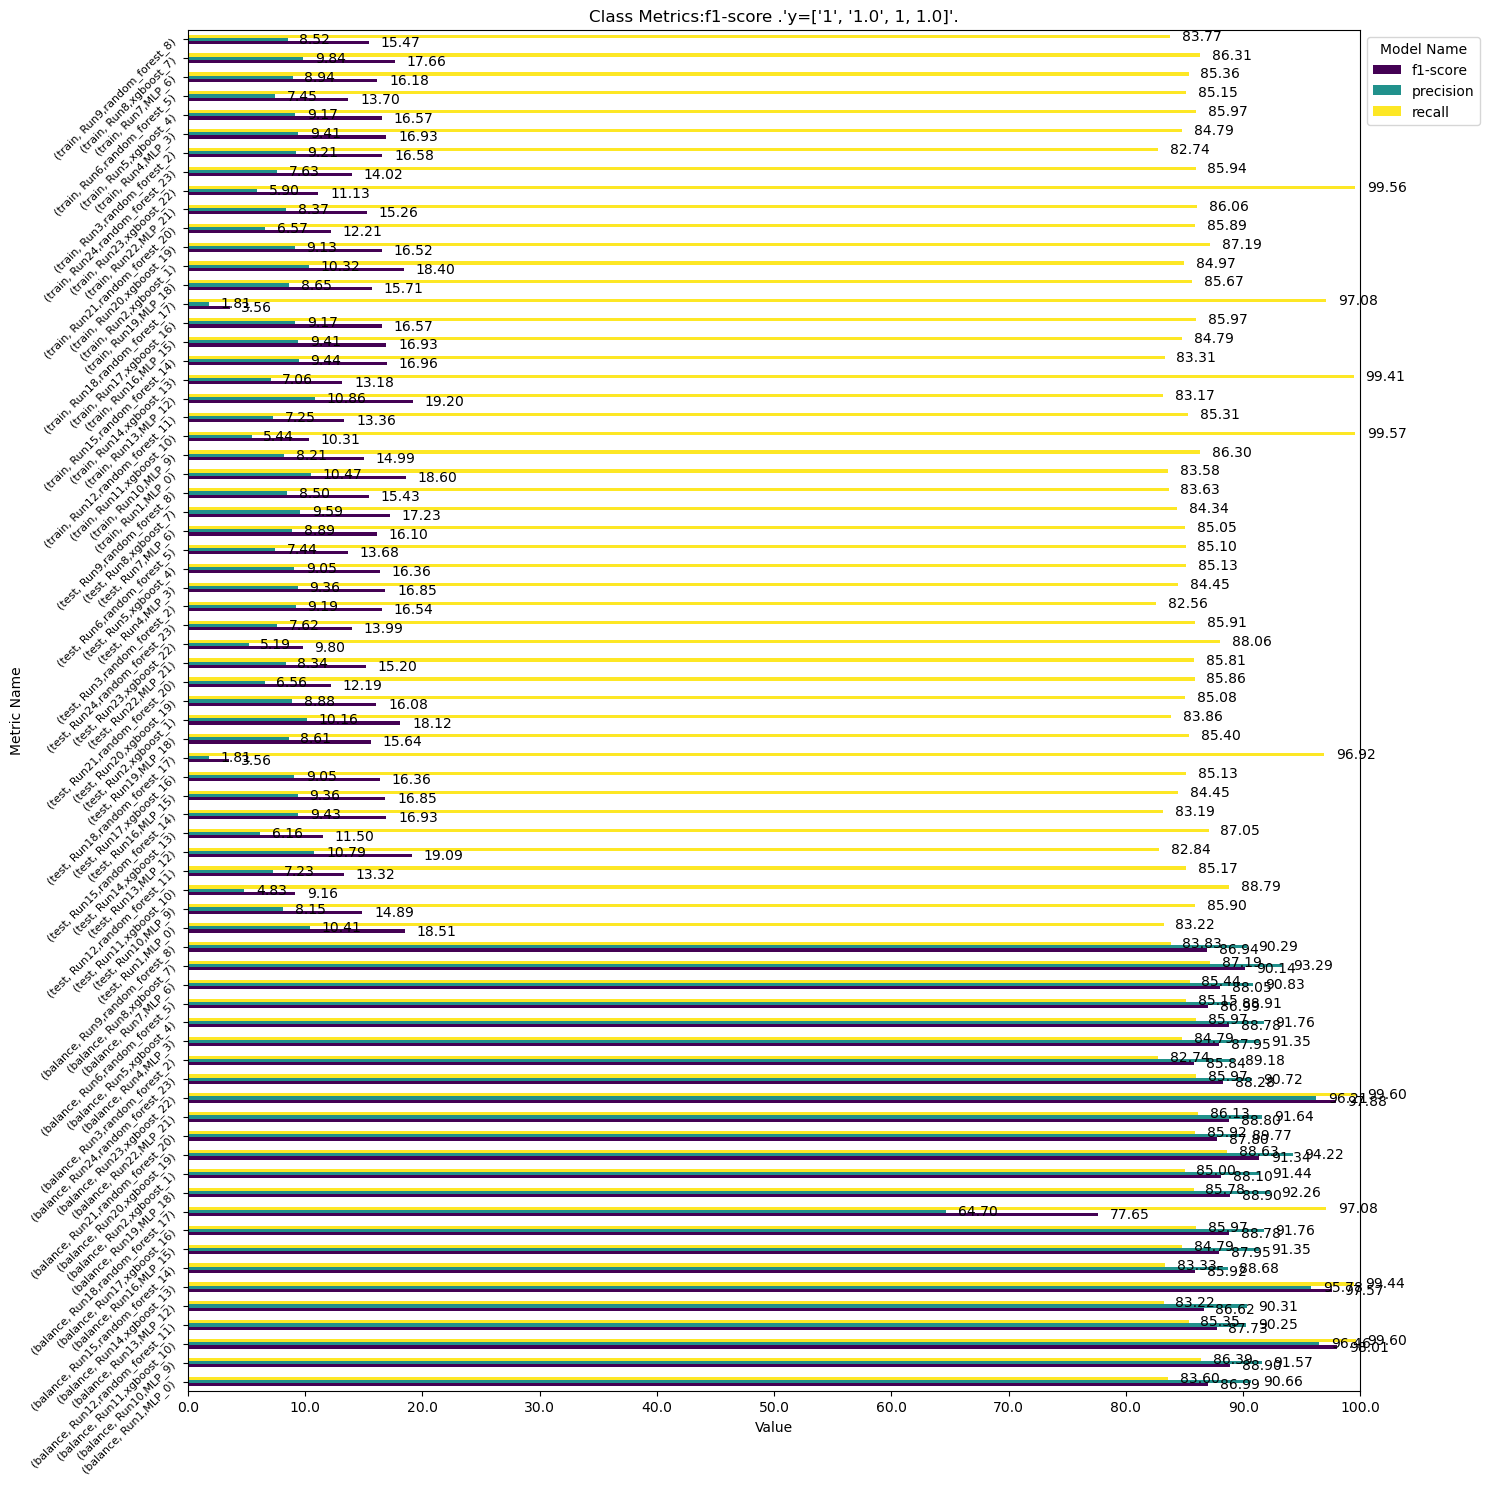

[01/30/25 20:26:15] INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=17933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=780360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

,model_name,dataset_name,metric_name,metric_type,class_name,value
116,"Run13,MLP_12",test,f1-score,class metric,1.0,19.0868
114,"Run13,MLP_12",test,precision,class metric,1.0,10.7860
160,"Run18,random_forest_17",test,recall,class metric,1.0,96.9176
113,"Run13,MLP_12",train,f1-score,class metric,1.0,19.2037
111,"Run13,MLP_12",train,precision,class metric,1.0,10.8550
94,"Run11,xgboost_10",train,recall,class metric,1.0,99.5710


                    INFO     Mejores algoritmos:                                                      ]8;id=846208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=373959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

,best_model_name,best_unbiased_model,best_fitting_model
model_name,"Run13,MLP_12","Run13,MLP_12","Run18,random_forest_17"
metric_name,f1-score,f1-score,f1-score
metric_type,class metric,class metric,class metric
class_name,1.0,1.0,1.0
test,19.0868,19.0868,3.5561
balance,86.6181,86.6181,77.6461
train,19.2037,19.2037,3.5579
bias,-67.4144,-67.4144,-74.0882
real_bias,True,True,True
test-train,-0.1169,-0.1169,-0.0018


In [21]:
info_save_all_mix = {}
info_save_all_mix['nodo_run'] = info_save_all_exp1['nodo_run'] + info_save_all_exp2['nodo_run']
print('Añadiendo experimento 1')
for i in range(info_save_all_exp1['nodo_run']): 
    print('Experimento 1:',i)
    info_save_all_mix[i] = info_save_all_exp1[i]

print('Añadiendo experimento 2')
all_results = info_save_all_exp2['all_results']
# best_model_metrics_dataset = info_save_all_exp2['best_model_metrics_dataset']
# select_model = info_save_all_exp2['select_model']

for j in range(info_save_all_exp2['nodo_run']): 
    print('Experimento 2:',j,'Identificado como: ',i+j+1)
    info_save_all_mix[i+j+1] = info_save_all_exp2[j]
    print('Cambio de identificacion:')
    name_model = info_save_all_exp2[j]['name_model']
    name_model1 = info_save_all_exp2[j]['name_model'].split('Run').copy() # 'Run'
    name_model1[-1] = str((i+j+1)+1)
    name_model1[0] = 'Run'
    name_model1 = ''.join(name_model1)
    info_save_all_mix[i+j+1]['name_model'] = name_model1
    print(name_model,':',name_model1)
    model_name = info_save_all_exp2[j]['model_name']
    model_name1 = info_save_all_exp2[j]['model_name'].split('_').copy()
    model_name1[-1] = str(i+j+1)
    model_name1 = '_'.join(model_name1)
    info_save_all_mix[i+j+1]['model_name'] = model_name1
    print(model_name,':',model_name1)
    all_results = all_results.replace(name_model+','+model_name,name_model1+','+model_name1)
    # best_model_metrics_dataset = best_model_metrics_dataset.replace(name_model+','+model_name,name_model1+','+model_name1)
    # select_model = select_model.replace(name_model+','+model_name,name_model1+','+model_name1)
    print('----')
all_results = pd.concat([info_save_all_exp1['all_results'],all_results], axis = 0)
all_results.index = list(range(all_results.shape[0]))
info_save_all_mix['all_results'] = all_results
# info_save_all_mix['best_model_metrics_dataset'] = None
# info_save_all_mix['select_model'] = None
info_save_all = models.compare_metrics_models(info_save_all_mix, params)

In [22]:
info_save_all.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'all_results', 'best_model_metrics_dataset', 'select_model'])

## Guardando combinacion de experimentos en ruta local:

In [8]:
info_save_model_i = catalog.load('info_save_select_anterior')

[02/03/25 19:33:48] INFO     Loading data from 'info_save_select_anterior' (PickleDataSet)...   ]8;id=583305;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=176547;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
for col in [0,1,2,3,5,6,7,10,11]:
    info_save_model_i[col]['Scaler'].outliers_adj['Method'] = 'log'

In [10]:
for col in [0,1,2,3,5,6,7,10,11]:
    display(info_save_model_i[col]['Scaler'].outliers_adj['Method'])


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object


columns
cdt_cant_prev                            log
cdt_cant                                 log
ah_sum_monto_trx_debito_mean_2           log
delta_ah_sum_monto_trx_credito           log
ah_sum_monto_trx_credito_mean_2          log
ah_sum_monto_trx_debito_mean_6           log
ah_cant                                  log
viv_cant                                 log
tc_sum_facturacion_total_valor_mean_2    log
tc_sum_facturacion_total_valor           log
ld_sum_saldo_promedio                    log
sus_saldo_promedio                       log
Name: Method, dtype: object

import pickle

# Especificas la ruta donde quieres guardar el modelo
ruta = "/home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Calibracion de Productos/guardar_modelo2.pickle"

# Guardas el modelo en esa ruta
with open(ruta, 'wb') as archivo:
    pickle.dump(info_save_model_i, archivo)

print("Modelo guardado en", ruta)

## Guardando combinacion de experimentos en S3:

import boto3
from botocore.exceptions import NoCredentialsError

# Crear un cliente de S3
s3_client = boto3.client('s3')

# Ruta local al modelo
ruta_local = "/home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Calibracion de Productos/guardar_modelo2.pickle"

# Nombre de tu bucket de S3
bucket_name = 'data-bbog-dev-sandbox-entity'

# Nombre de la "carpeta" dentro del bucket (puedes tratarlo como un prefijo de ruta)
carpeta_s3 = 'casos-uso/fabrica-personas/CDT/07-model_selection/'

# Nombre final del archivo en S3 (puedes cambiar el nombre si lo deseas)
nombre_s3 = carpeta_s3 + 'info_save_select_mvp7_from_mvp4.pickle'

# Subir el archivo
try:
    s3_client.upload_file(ruta_local, bucket_name, nombre_s3)
    print(f"Modelo subido con éxito a {bucket_name}/{nombre_s3}")
except FileNotFoundError:
    print(f"El archivo {ruta_local} no se encuentra en el sistema local.")
except NoCredentialsError:
    print("No se encontraron las credenciales de AWS.")
except Exception as e:
    print(f"Error al subir el archivo: {e}")

In [14]:
import boto3
import botocore
import jmespath
import s3transfer
print(boto3.__version__)
print(botocore.__version__)
print(jmespath.__version__)
print(s3transfer.__version__)

1.35.13
1.35.13
1.0.1
0.10.2


In [23]:
for i in range(24):
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [24]:
# sin eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

,REINDEX,ocupacion
llave,,
0,ocupacion_comerciante,empleado_privado
1,ocupacion_desempleado,pensionado
2,ocupacion_empleado_entidad,empleado_publico
3,ocupacion_empleado_privado,independiente
4,ocupacion_empleado_publico,estudiante
5,ocupacion_estudiante,rentista_de_capital
6,ocupacion_fuerzas_militares,hogar
7,ocupacion_hogar,fuerzas_militares
8,ocupacion_independiente,desempleado


In [25]:
# MIXTO
pct = 0.25
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run8', 'Run13', 'Run15', 'Run16']
[1, 1, 1, 1, 1, 1]
Total de modelo:  6


,model_name,dataset_name,metric_name,metric_type,class_name,value
738,"Run13,MLP_12",test,f1-score,class metric,1.0,19.0868
54,"Run1,MLP_0",test,f1-score,class metric,1.0,18.5102
111,"Run2,xgboost_1",test,f1-score,class metric,1.0,18.1227
453,"Run8,xgboost_7",test,f1-score,class metric,1.0,17.2252
852,"Run15,random_forest_14",test,f1-score,class metric,1.0,16.9317
909,"Run16,MLP_15",test,f1-score,class metric,1.0,16.8493


,model_name,dataset_name,metric_name,metric_type,class_name,value
719,"Run13,MLP_12",train,f1-score,class metric,1.0,19.2037
35,"Run1,MLP_0",train,f1-score,class metric,1.0,18.6021
92,"Run2,xgboost_1",train,f1-score,class metric,1.0,18.4026
434,"Run8,xgboost_7",train,f1-score,class metric,1.0,17.6612
833,"Run15,random_forest_14",train,f1-score,class metric,1.0,16.9618
890,"Run16,MLP_15",train,f1-score,class metric,1.0,16.9345


,model_name,dataset_name,metric_name,metric_type,class_name,value
116,"Run13,MLP_12",test,f1-score,class metric,1.0,19.0868
114,"Run13,MLP_12",test,precision,class metric,1.0,10.7860
160,"Run18,random_forest_17",test,recall,class metric,1.0,96.9176
113,"Run13,MLP_12",train,f1-score,class metric,1.0,19.2037
111,"Run13,MLP_12",train,precision,class metric,1.0,10.8550
94,"Run11,xgboost_10",train,recall,class metric,1.0,99.5710


In [43]:
ensamble = ["Run1","Run2","Run5","Run8","Run17","Run20"]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))

['Run1', 'Run2', 'Run5', 'Run8', 'Run17', 'Run20']
[1, 1, 1, 1, 1, 1]
Total de modelo:  6


## model_selection

In [44]:
params['Ensamble']['want'] = True
params['optimizacion_bayesiana']['want'] = False
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [45]:
params['n_obs_filter']

0.3

In [46]:
params['use_key']

{'want': False, 'llave': ['Run10,xgboost_9'], 'estrategia': ['best_model_name']}

In [47]:
params['Ensamble']


{
    'want': True,
    'Algoritmos': ['Run1', 'Run2', 'Run5', 'Run8', 'Run17', 'Run20'],
    'weights': [1, 1, 1, 1, 1, 1],
    'scorer': 'backtest_scorer'
}

In [48]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

[01/30/25 16:41:16] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=301879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=995647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#747\747]8;;\

                    INFO     train                                                                     ]8;id=951593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=393765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:41:39] INFO     Nodo 1, Run2                                                              ]8;id=277657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=894610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:41:42] INFO     Nodo 4, Run5                                                              ]8;id=411379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=215468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:02] INFO     Nodo 7, Run8                                                              ]8;id=761392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=262610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:08] INFO     Nodo 16, Run17                                                            ]8;id=901074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:28] INFO     Nodo 19, Run20                                                            ]8;id=767273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:38] INFO     test                                                                      ]8;id=226511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=7282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=678068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=235338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:44] INFO     Nodo 1, Run2                                                              ]8;id=430312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

                    INFO     Nodo 4, Run5                                                              ]8;id=958925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:49] INFO     Nodo 7, Run8                                                              ]8;id=187217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=298339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:51] INFO     Nodo 16, Run17                                                            ]8;id=692475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=816719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:42:56] INFO     Nodo 19, Run20                                                            ]8;id=744597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/30/25 16:43:23] INFO     Ok Forecast                                                               ]8;id=436813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=243248;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#723\723]8;;\

[01/30/25 16:43:24] INFO     Iniciando el calculo de las metricas...                                  ]8;id=639245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=419177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1073\1073]8;;\

                    INFO     Tipo de Threshold: KS                                                    ]8;id=27019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=14103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1079\1079]8;;\

                    INFO     Models: best_model_name                                                  ]8;id=676746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=769543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_model_name                                               ]8;id=718490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=958572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6746510                                                           ]8;id=907381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705263;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/30/25 16:43:42] INFO     TOP N: 1686627                                                           ]8;id=925954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.9436      Run13     MLP_12   
           true_sum n_top test           42747      Run13     MLP_12   
           backtest       test          2.5345      Run13     MLP_12   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[01/30/25 16:43:46] INFO     Models: best_unbiased_model                                              ]8;id=960742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=645138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_unbiased_model                                           ]8;id=861206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=514699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6746510                                                           ]8;id=600213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=524892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/30/25 16:44:05] INFO     TOP N: 1686627                                                           ]8;id=31500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=399514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.9436      Run13     MLP_12   
           true_sum n_top test           42747      Run13     MLP_12   
           backtest       test          2.5345      Run13     MLP_12   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[01/30/25 16:44:09] INFO     Models: best_fitting_model                                               ]8;id=408858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=241618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_fitting_model                                            ]8;id=371624;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=852492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6746510                                                           ]8;id=769584;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=326341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    8.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   26.1s
[Parallel(n_jobs=64)]: Done 450 out of 450 | elapsed:   34.9s finished


[01/30/25 16:44:56] INFO     TOP N: 1686627                                                           ]8;id=801994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=480154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    2.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    6.8s
[Parallel(n_jobs=64)]: Done 450 out of 450 | elapsed:    9.1s finished


value name_model        model_name  \
class_name metric_name    dataset_name                                        
1          f1-score n_top test          4.9306      Run18  random_forest_17   
           true_sum n_top test           42631      Run18  random_forest_17   
           backtest       test          2.5276      Run18  random_forest_17   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[01/30/25 16:45:07] INFO     Estrategy: modelo_produccion                                             ]8;id=834524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=711283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6746510                                                           ]8;id=878728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=474586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/30/25 16:45:33] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=98577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=792626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/30/25 16:45:34] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=770843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=1543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=572232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=895612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=316319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=843408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=552671;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=296162;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=780547;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=479927;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=226645;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=88055;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=747480;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=741350;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=57538;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=395455;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=530174;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=470028;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=529200;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=645819;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=384739;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=529509;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=195194;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=357304;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=77028;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=525636;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=793977;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=249121;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=494710;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=825868;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=262515;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=89535;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=517274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=614650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 16:45:40] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=416533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=493190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=588208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=808120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87]            ]8;id=528077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=106341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=656329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=414989;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=702776;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=199820;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=793246;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=441277;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=809036;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=476684;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=376902;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=770987;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=939687;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=336604;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=484860;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=725693;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=186397;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=297317;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=406822;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=765622;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=23286;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=739866;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=489924;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=273657;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=985033;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=934847;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=7566;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=701793;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=768362;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=140595;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=969918;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=120595;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=558332;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

[01/30/25 16:45:41] INFO     Finalizando el procesamiento del ks                                      ]8;id=924986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=480890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 16:46:04] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=948235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=842984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/30/25 16:46:05] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=694691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=190495;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=789459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=5851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=51213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=647519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=439706;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=222634;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=522345;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=687261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=946989;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=776017;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=283014;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=80016;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=150173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=408789;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=768796;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=71824;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=836332;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=520141;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=368264;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=373795;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=315580;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=954977;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=464376;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=105917;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=102707;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=341946;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=511558;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=24803;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=855554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 16:46:13] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=865897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=407336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=355545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=429305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87]            ]8;id=388069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=554507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=840709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=134166;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=726565;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=56000;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=606838;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=241978;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=782293;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=665100;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=633230;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

[01/30/25 16:46:14] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=997747;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=549277;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=776799;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=498689;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=57741;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=389158;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=560220;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=475505;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=281107;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=295100;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=426468;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=553952;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=811049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=702404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 16:46:37] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=824313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=753629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/30/25 16:46:38] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=177088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=619920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=24965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=354210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=539428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=814254;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=67384;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=198179;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=310246;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=811588;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=995930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=477212;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=418195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=630974;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=346298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=285490;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=547261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=712352;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=808399;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=109828;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=747211;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=206102;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=771047;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=687155;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=726619;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=675535;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=151876;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=217183;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=613428;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=194993;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=553973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=655021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 16:46:46] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=554691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=820926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/30/25 16:46:47] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=671460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=917589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87]            ]8;id=376206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=131801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=13580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=911218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=541985;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=480870;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=207250;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=527675;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=287606;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=540494;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=28480;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=360381;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=623630;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=923309;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=642693;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=3472;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=617801;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=854795;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=159657;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=40538;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=858345;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=748968;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=614153;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=843431;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=18730;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=924065;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=792047;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=31738;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=294346;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=343653;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=990800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=134819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=661758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=284478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=148744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=100370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 16:47:14] INFO     Update probs: Selected: 0, Target Select: 6746510, Diff %: -1.0           ]8;id=143656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=205914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 16:47:18] INFO     Update probs: Selected: 236750, Target Select: 6746510, Diff %:           ]8;id=252137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=352559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964907781949482                                                                    

[01/30/25 16:47:22] INFO     Update probs: Selected: 473381, Target Select: 6746510, Diff %:           ]8;id=562057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298332026484805                                                                   

[01/30/25 16:47:27] INFO     Update probs: Selected: 710147, Target Select: 6746510, Diff %:           ]8;id=542511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=885575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947386130013889                                                                   

[01/30/25 16:47:31] INFO     Update probs: Selected: 946763, Target Select: 6746510, Diff %:           ]8;id=227830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=817650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596662570721751                                                                   

[01/30/25 16:47:35] INFO     Update probs: Selected: 1183630, Target Select: 6746510, Diff %:          ]8;id=958774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=160744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245566967217124                                                                   

[01/30/25 16:47:40] INFO     Update probs: Selected: 1420489, Target Select: 6746510, Diff %:          ]8;id=575609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429029;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894483221695365                                                                   

[01/30/25 16:47:44] INFO     Update probs: Selected: 1657094, Target Select: 6746510, Diff %:          ]8;id=915725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=818691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543775967129671                                                                   

[01/30/25 16:47:48] INFO     Update probs: Selected: 1893782, Target Select: 6746510, Diff %:          ]8;id=719623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=566159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192945685991721                                                                   

[01/30/25 16:47:52] INFO     Update probs: Selected: 2130309, Target Select: 6746510, Diff %:          ]8;id=179701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=991681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.684235404675899                                                                    

[01/30/25 16:47:57] INFO     Update probs: Selected: 2367372, Target Select: 6746510, Diff %:          ]8;id=853090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490967922674094                                                                   

[01/30/25 16:48:01] INFO     Update probs: Selected: 2603530, Target Select: 6746510, Diff %:          ]8;id=284855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140923232901159                                                                   

[01/30/25 16:48:05] INFO     Update probs: Selected: 2840387, Target Select: 6746510, Diff %:          ]8;id=714452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=643427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789842451875118                                                                   

[01/30/25 16:48:10] INFO     Update probs: Selected: 3077567, Target Select: 6746510, Diff %:          ]8;id=180306;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486704;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438282904790773                                                                   

[01/30/25 16:48:14] INFO     Update probs: Selected: 3314665, Target Select: 6746510, Diff %:          ]8;id=633939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=73337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5086844902030828                                                                   

[01/30/25 16:48:18] INFO     Update probs: Selected: 3550977, Target Select: 6746510, Diff %:          ]8;id=937471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=877766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736571946087681                                                                   

[01/30/25 16:48:22] INFO     Update probs: Selected: 3787200, Target Select: 6746510, Diff %:          ]8;id=249066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=689582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4386430910203942                                                                   

[01/30/25 16:48:27] INFO     Update probs: Selected: 4024219, Target Select: 6746510, Diff %:          ]8;id=417151;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.403511000502482                                                                    

[01/30/25 16:48:31] INFO     Update probs: Selected: 4260140, Target Select: 6746510, Diff %:          ]8;id=975474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=211333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36854166079943557                                                                  

[01/30/25 16:48:35] INFO     Update probs: Selected: 4496836, Target Select: 6746510, Diff %:          ]8;id=765748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3334574468873536                                                                   

[01/30/25 16:48:39] INFO     Update probs: Selected: 4733462, Target Select: 6746510, Diff %:          ]8;id=192286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55636;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983836087102813                                                                   

[01/30/25 16:48:44] INFO     Update probs: Selected: 4970054, Target Select: 6746510, Diff %:          ]8;id=638488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=621255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.263314810175928                                                                    

[01/30/25 16:48:48] INFO     Update probs: Selected: 5206752, Target Select: 6746510, Diff %:          ]8;id=802421;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=809267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22823029981427434                                                                  

[01/30/25 16:48:52] INFO     Update probs: Selected: 5681904, Target Select: 6746510, Diff %:          ]8;id=376499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1578009963670105                                                                   

[01/30/25 16:48:57] INFO     Update probs: Selected: 6154777, Target Select: 6746510, Diff %:          ]8;id=921654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=362268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08770949720670392                                                                  

[01/30/25 16:49:01] INFO     Update probs: Selected: 6390600, Target Select: 6746510, Diff %:          ]8;id=62272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=636400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052754683532670966                                                                 

[01/30/25 16:49:05] INFO     Update probs: Selected: 6746510, Target Select: 6746510, Diff %: 0.0      ]8;id=627068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=222043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=70879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=677226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=649543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=156845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 16:49:10] INFO     Update probs: Selected: 0, Target Select: 6746510, Diff %: -1.0           ]8;id=22041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 16:49:14] INFO     Update probs: Selected: 236790, Target Select: 6746510, Diff %:           ]8;id=267072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=124694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964901852958048                                                                    

[01/30/25 16:49:19] INFO     Update probs: Selected: 473326, Target Select: 6746510, Diff %:           ]8;id=197216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298413550117024                                                                   

[01/30/25 16:49:23] INFO     Update probs: Selected: 710152, Target Select: 6746510, Diff %:           ]8;id=386517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=263382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947378718774596                                                                   

[01/30/25 16:49:27] INFO     Update probs: Selected: 946737, Target Select: 6746510, Diff %:           ]8;id=994622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596701109166073                                                                   

[01/30/25 16:49:31] INFO     Update probs: Selected: 1183508, Target Select: 6746510, Diff %:          ]8;id=190270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245747801455864                                                                   

[01/30/25 16:49:35] INFO     Update probs: Selected: 1420319, Target Select: 6746510, Diff %:          ]8;id=602873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894735203831315                                                                   

[01/30/25 16:49:40] INFO     Update probs: Selected: 1657035, Target Select: 6746510, Diff %:          ]8;id=453856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=462048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543863419753324                                                                   

[01/30/25 16:49:44] INFO     Update probs: Selected: 1893576, Target Select: 6746510, Diff %:          ]8;id=24942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193251029050576                                                                   

[01/30/25 16:49:48] INFO     Update probs: Selected: 2130395, Target Select: 6746510, Diff %:          ]8;id=810381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=228407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842226573443158                                                                   

[01/30/25 16:49:52] INFO     Update probs: Selected: 2367007, Target Select: 6746510, Diff %:          ]8;id=966571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=422885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491508943142454                                                                   

[01/30/25 16:49:56] INFO     Update probs: Selected: 2604387, Target Select: 6746510, Diff %:          ]8;id=929964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=916507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139652946486406                                                                   

[01/30/25 16:50:01] INFO     Update probs: Selected: 2840692, Target Select: 6746510, Diff %:          ]8;id=161672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789390366278269                                                                   

[01/30/25 16:50:05] INFO     Update probs: Selected: 3076986, Target Select: 6746510, Diff %:          ]8;id=682447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439144090796575                                                                   

[01/30/25 16:50:09] INFO     Update probs: Selected: 3314558, Target Select: 6746510, Diff %:          ]8;id=340413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=457141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.508700350255169                                                                    

[01/30/25 16:50:13] INFO     Update probs: Selected: 3551060, Target Select: 6746510, Diff %:          ]8;id=777035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=31481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47364489195154236                                                                  

[01/30/25 16:50:17] INFO     Update probs: Selected: 3786696, Target Select: 6746510, Diff %:          ]8;id=190940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=866286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43871779631246377                                                                  

[01/30/25 16:50:22] INFO     Update probs: Selected: 4259732, Target Select: 6746510, Diff %:          ]8;id=483241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36860213651206325                                                                  

[01/30/25 16:50:26] INFO     Update probs: Selected: 4494834, Target Select: 6746510, Diff %:          ]8;id=313092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3337541929086298                                                                   

[01/30/25 16:50:30] INFO     Update probs: Selected: 4732800, Target Select: 6746510, Diff %:          ]8;id=652313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=710050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2984817335185155                                                                   

[01/30/25 16:50:34] INFO     Update probs: Selected: 4968940, Target Select: 6746510, Diff %:          ]8;id=630304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=72481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2634799325873674                                                                   

[01/30/25 16:50:38] INFO     Update probs: Selected: 5204269, Target Select: 6746510, Diff %:          ]8;id=553989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22859834195754547                                                                  

[01/30/25 16:50:43] INFO     Update probs: Selected: 5440988, Target Select: 6746510, Diff %:          ]8;id=607063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=90749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1935107188753889                                                                   

[01/30/25 16:50:47] INFO     Update probs: Selected: 5677967, Target Select: 6746510, Diff %:          ]8;id=554723;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15838455734891077                                                                  

[01/30/25 16:50:51] INFO     Update probs: Selected: 6152496, Target Select: 6746510, Diff %:          ]8;id=357898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=915114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08804759794323287                                                                  

[01/30/25 16:50:55] INFO     Update probs: Selected: 6623459, Target Select: 6746510, Diff %:          ]8;id=293639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=639566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.018239208123904064                                                                 

[01/30/25 16:51:00] INFO     Update probs: Selected: 6746510, Target Select: 6746510, Diff %: 0.0      ]8;id=827419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=60583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=677710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=875974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=874204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=710786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=981013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=590954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 16:51:22] INFO     Update probs: Selected: 0, Target Select: 6746510, Diff %: -1.0           ]8;id=481626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=449001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 16:51:27] INFO     Update probs: Selected: 236730, Target Select: 6746510, Diff %:           ]8;id=991169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964910746445199                                                                    

[01/30/25 16:51:31] INFO     Update probs: Selected: 473600, Target Select: 6746510, Diff %:           ]8;id=344079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=540014;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298007414203788                                                                   

[01/30/25 16:51:35] INFO     Update probs: Selected: 710256, Target Select: 6746510, Diff %:           ]8;id=930224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=877509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947224564997309                                                                   

[01/30/25 16:51:39] INFO     Update probs: Selected: 946743, Target Select: 6746510, Diff %:           ]8;id=639479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=699219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596692215678922                                                                   

[01/30/25 16:51:43] INFO     Update probs: Selected: 1183625, Target Select: 6746510, Diff %:          ]8;id=118033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=895190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245574378456417                                                                   

[01/30/25 16:51:47] INFO     Update probs: Selected: 1420423, Target Select: 6746510, Diff %:          ]8;id=635041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=153774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894581050054028                                                                   

[01/30/25 16:51:52] INFO     Update probs: Selected: 1657238, Target Select: 6746510, Diff %:          ]8;id=14143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=722063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543562523438044                                                                   

[01/30/25 16:51:56] INFO     Update probs: Selected: 1893662, Target Select: 6746510, Diff %:          ]8;id=546367;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=290967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193123555734743                                                                   

[01/30/25 16:52:00] INFO     Update probs: Selected: 2130724, Target Select: 6746510, Diff %:          ]8;id=679871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=331880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841738913897704                                                                   

[01/30/25 16:52:04] INFO     Update probs: Selected: 2367514, Target Select: 6746510, Diff %:          ]8;id=791824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490757443478183                                                                   

[01/30/25 16:52:08] INFO     Update probs: Selected: 2603495, Target Select: 6746510, Diff %:          ]8;id=819751;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140975111576208                                                                   

[01/30/25 16:52:13] INFO     Update probs: Selected: 2840601, Target Select: 6746510, Diff %:          ]8;id=54993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=140249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789525250833394                                                                   

[01/30/25 16:52:17] INFO     Update probs: Selected: 3076804, Target Select: 6746510, Diff %:          ]8;id=24916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=915607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439413859906825                                                                   

[01/30/25 16:52:21] INFO     Update probs: Selected: 3314036, Target Select: 6746510, Diff %:          ]8;id=504464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=79620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087777235933838                                                                   

[01/30/25 16:52:25] INFO     Update probs: Selected: 3550933, Target Select: 6746510, Diff %:          ]8;id=829173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=490122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736637164993456                                                                   

[01/30/25 16:52:29] INFO     Update probs: Selected: 3787971, Target Select: 6746510, Diff %:          ]8;id=973718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385288097105022                                                                   

[01/30/25 16:52:34] INFO     Update probs: Selected: 4023463, Target Select: 6746510, Diff %:          ]8;id=3696;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=410662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4036230584405863                                                                   

[01/30/25 16:52:38] INFO     Update probs: Selected: 4261465, Target Select: 6746510, Diff %:          ]8;id=234094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=605049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683452629581813                                                                   

[01/30/25 16:52:42] INFO     Update probs: Selected: 4496682, Target Select: 6746510, Diff %:          ]8;id=490287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=794188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33348027350437487                                                                  

[01/30/25 16:52:46] INFO     Update probs: Selected: 4733337, Target Select: 6746510, Diff %:          ]8;id=458618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29840213680851285                                                                  

[01/30/25 16:52:50] INFO     Update probs: Selected: 4971631, Target Select: 6746510, Diff %:          ]8;id=478798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=496197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26308105968863904                                                                  

[01/30/25 16:52:55] INFO     Update probs: Selected: 5444230, Target Select: 6746510, Diff %:          ]8;id=950899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19303017411965595                                                                  

[01/30/25 16:52:59] INFO     Update probs: Selected: 5682352, Target Select: 6746510, Diff %:          ]8;id=34047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=724156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1577345916629487                                                                   

[01/30/25 16:53:03] INFO     Update probs: Selected: 5917027, Target Select: 6746510, Diff %:          ]8;id=797743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=373323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12294994004307412                                                                  

[01/30/25 16:53:07] INFO     Update probs: Selected: 6153659, Target Select: 6746510, Diff %:          ]8;id=367872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813064;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08787521251728672                                                                  

[01/30/25 16:53:11] INFO     Update probs: Selected: 6389792, Target Select: 6746510, Diff %:          ]8;id=842152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=947745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052874449159639576                                                                 

[01/30/25 16:53:16] INFO     Update probs: Selected: 6626298, Target Select: 6746510, Diff %:          ]8;id=58172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017818397956869552                                                                 

[01/30/25 16:53:20] INFO     Update probs: Selected: 6746510, Target Select: 6746510, Diff %: 0.0      ]8;id=106945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=854723;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=782924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/30/25 16:53:21] INFO     ------------------------------------------------------                    ]8;id=152319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=338090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=467687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 16:53:28] INFO     Update probs: Selected: 0, Target Select: 6746510, Diff %: -1.0           ]8;id=871396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 16:53:32] INFO     Update probs: Selected: 236737, Target Select: 6746510, Diff %:           ]8;id=337291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=724197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649097088716981                                                                   

[01/30/25 16:53:36] INFO     Update probs: Selected: 473427, Target Select: 6746510, Diff %:           ]8;id=723122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298263843083313                                                                   

[01/30/25 16:53:40] INFO     Update probs: Selected: 710277, Target Select: 6746510, Diff %:           ]8;id=552316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=672893;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947193437792281                                                                   

[01/30/25 16:53:45] INFO     Update probs: Selected: 946721, Target Select: 6746510, Diff %:           ]8;id=780133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=335527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596724825131808                                                                   

[01/30/25 16:53:49] INFO     Update probs: Selected: 1183711, Target Select: 6746510, Diff %:          ]8;id=67664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=624729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245446905140584                                                                   

[01/30/25 16:53:53] INFO     Update probs: Selected: 1420458, Target Select: 6746510, Diff %:          ]8;id=433647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=330164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.789452917137898                                                                    

[01/30/25 16:53:57] INFO     Update probs: Selected: 1656840, Target Select: 6746510, Diff %:          ]8;id=961942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544152458085737                                                                   

[01/30/25 16:54:02] INFO     Update probs: Selected: 1893550, Target Select: 6746510, Diff %:          ]8;id=8149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193289567494897                                                                   

[01/30/25 16:54:06] INFO     Update probs: Selected: 2130163, Target Select: 6746510, Diff %:          ]8;id=265135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=824311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842570454946335                                                                   

[01/30/25 16:54:10] INFO     Update probs: Selected: 2366856, Target Select: 6746510, Diff %:          ]8;id=295142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=777625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491732762569091                                                                   

[01/30/25 16:54:14] INFO     Update probs: Selected: 2604260, Target Select: 6746510, Diff %:          ]8;id=549112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=8009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139841191964438                                                                   

[01/30/25 16:54:19] INFO     Update probs: Selected: 2841057, Target Select: 6746510, Diff %:          ]8;id=899502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=347189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788849345809908                                                                   

[01/30/25 16:54:23] INFO     Update probs: Selected: 3077418, Target Select: 6746510, Diff %:          ]8;id=596455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=300598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438503759721693                                                                   

[01/30/25 16:54:27] INFO     Update probs: Selected: 3314689, Target Select: 6746510, Diff %:          ]8;id=218065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=926701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5086809328082224                                                                   

[01/30/25 16:54:31] INFO     Update probs: Selected: 3551334, Target Select: 6746510, Diff %:          ]8;id=880365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47360427836021884                                                                  

[01/30/25 16:54:36] INFO     Update probs: Selected: 3787183, Target Select: 6746510, Diff %:          ]8;id=915012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=954999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43864561084175374                                                                  

[01/30/25 16:54:40] INFO     Update probs: Selected: 4023640, Target Select: 6746510, Diff %:          ]8;id=464976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=916048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40359682265349045                                                                  

[01/30/25 16:54:44] INFO     Update probs: Selected: 4260993, Target Select: 6746510, Diff %:          ]8;id=502418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=585949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684152250571036                                                                   

[01/30/25 16:54:48] INFO     Update probs: Selected: 4497710, Target Select: 6746510, Diff %:          ]8;id=511558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=21956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33332789842451876                                                                  

[01/30/25 16:54:53] INFO     Update probs: Selected: 4970333, Target Select: 6746510, Diff %:          ]8;id=53591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=554119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2632734554606752                                                                   

[01/30/25 16:54:57] INFO     Update probs: Selected: 5206675, Target Select: 6746510, Diff %:          ]8;id=928123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22824171312278496                                                                  

[01/30/25 16:55:01] INFO     Update probs: Selected: 5443159, Target Select: 6746510, Diff %:          ]8;id=120582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=477484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1931889228653037                                                                   

[01/30/25 16:55:05] INFO     Update probs: Selected: 5680782, Target Select: 6746510, Diff %:          ]8;id=933978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=367120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15796730457673672                                                                  

[01/30/25 16:55:10] INFO     Update probs: Selected: 5919590, Target Select: 6746510, Diff %:          ]8;id=751920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12257003991693483                                                                  

[01/30/25 16:55:14] INFO     Update probs: Selected: 6153213, Target Select: 6746510, Diff %:          ]8;id=248356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=354717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08794132077177681                                                                  

[01/30/25 16:55:18] INFO     Update probs: Selected: 6628942, Target Select: 6746510, Diff %:          ]8;id=85961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=260947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01742649162307623                                                                  

[01/30/25 16:55:22] INFO     Update probs: Selected: 6746510, Target Select: 6746510, Diff %: 0.0      ]8;id=558719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=946842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=870000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=820048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/30/25 16:55:24] INFO     ------------------------------------------------------                    ]8;id=20;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408751;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_16,Run17. Weight: 1                                       ]8;id=173943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 16:55:46] INFO     Update probs: Selected: 0, Target Select: 6746510, Diff %: -1.0           ]8;id=148475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=636143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 16:55:50] INFO     Update probs: Selected: 236730, Target Select: 6746510, Diff %:           ]8;id=710391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=420374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964910746445199                                                                    

[01/30/25 16:55:55] INFO     Update probs: Selected: 473600, Target Select: 6746510, Diff %:           ]8;id=972809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=759329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298007414203788                                                                   

[01/30/25 16:55:59] INFO     Update probs: Selected: 710256, Target Select: 6746510, Diff %:           ]8;id=254795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=494204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947224564997309                                                                   

[01/30/25 16:56:03] INFO     Update probs: Selected: 946743, Target Select: 6746510, Diff %:           ]8;id=148023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596692215678922                                                                   

[01/30/25 16:56:07] INFO     Update probs: Selected: 1183625, Target Select: 6746510, Diff %:          ]8;id=293036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245574378456417                                                                   

[01/30/25 16:56:12] INFO     Update probs: Selected: 1420423, Target Select: 6746510, Diff %:          ]8;id=205831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=559309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894581050054028                                                                   

[01/30/25 16:56:16] INFO     Update probs: Selected: 1657238, Target Select: 6746510, Diff %:          ]8;id=396041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=40969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543562523438044                                                                   

[01/30/25 16:56:20] INFO     Update probs: Selected: 1893662, Target Select: 6746510, Diff %:          ]8;id=98445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=562018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193123555734743                                                                   

[01/30/25 16:56:24] INFO     Update probs: Selected: 2130724, Target Select: 6746510, Diff %:          ]8;id=737411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=595192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841738913897704                                                                   

[01/30/25 16:56:28] INFO     Update probs: Selected: 2367514, Target Select: 6746510, Diff %:          ]8;id=799548;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=147119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490757443478183                                                                   

[01/30/25 16:56:33] INFO     Update probs: Selected: 2603495, Target Select: 6746510, Diff %:          ]8;id=426359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=924873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140975111576208                                                                   

[01/30/25 16:56:37] INFO     Update probs: Selected: 2840601, Target Select: 6746510, Diff %:          ]8;id=984420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=809781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789525250833394                                                                   

[01/30/25 16:56:41] INFO     Update probs: Selected: 3076804, Target Select: 6746510, Diff %:          ]8;id=316859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=570513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439413859906825                                                                   

[01/30/25 16:56:45] INFO     Update probs: Selected: 3314036, Target Select: 6746510, Diff %:          ]8;id=368661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=99335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087777235933838                                                                   

[01/30/25 16:56:50] INFO     Update probs: Selected: 3550933, Target Select: 6746510, Diff %:          ]8;id=347742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=633633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736637164993456                                                                   

[01/30/25 16:56:54] INFO     Update probs: Selected: 3787971, Target Select: 6746510, Diff %:          ]8;id=147926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=614870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385288097105022                                                                   

[01/30/25 16:56:58] INFO     Update probs: Selected: 4023463, Target Select: 6746510, Diff %:          ]8;id=594999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=730226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4036230584405863                                                                   

[01/30/25 16:57:02] INFO     Update probs: Selected: 4261465, Target Select: 6746510, Diff %:          ]8;id=134063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683452629581813                                                                   

[01/30/25 16:57:07] INFO     Update probs: Selected: 4496682, Target Select: 6746510, Diff %:          ]8;id=882708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=320609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33348027350437487                                                                  

[01/30/25 16:57:11] INFO     Update probs: Selected: 4733337, Target Select: 6746510, Diff %:          ]8;id=677219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=375634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29840213680851285                                                                  

[01/30/25 16:57:15] INFO     Update probs: Selected: 4971631, Target Select: 6746510, Diff %:          ]8;id=680901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=169973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26308105968863904                                                                  

[01/30/25 16:57:19] INFO     Update probs: Selected: 5444230, Target Select: 6746510, Diff %:          ]8;id=600528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=529147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19303017411965595                                                                  

[01/30/25 16:57:24] INFO     Update probs: Selected: 5682352, Target Select: 6746510, Diff %:          ]8;id=587225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1577345916629487                                                                   

[01/30/25 16:57:28] INFO     Update probs: Selected: 5917027, Target Select: 6746510, Diff %:          ]8;id=889710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=902056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12294994004307412                                                                  

[01/30/25 16:57:32] INFO     Update probs: Selected: 6153659, Target Select: 6746510, Diff %:          ]8;id=407818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=169085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08787521251728672                                                                  

[01/30/25 16:57:36] INFO     Update probs: Selected: 6389792, Target Select: 6746510, Diff %:          ]8;id=185925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=811232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052874449159639576                                                                 

[01/30/25 16:57:41] INFO     Update probs: Selected: 6626298, Target Select: 6746510, Diff %:          ]8;id=173766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=726960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017818397956869552                                                                 

[01/30/25 16:57:45] INFO     Update probs: Selected: 6746510, Target Select: 6746510, Diff %: 0.0      ]8;id=585099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=72908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=825603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/30/25 16:57:47] INFO     ------------------------------------------------------                    ]8;id=835654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=131933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_19,Run20. Weight: 1                                       ]8;id=739880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=755405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 16:57:54] INFO     Update probs: Selected: 0, Target Select: 6746510, Diff %: -1.0           ]8;id=473273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=445135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 16:57:58] INFO     Update probs: Selected: 236687, Target Select: 6746510, Diff %:           ]8;id=67479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=901436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649171201109907                                                                   

[01/30/25 16:58:02] INFO     Update probs: Selected: 473466, Target Select: 6746510, Diff %:           ]8;id=26225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=468937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929820603541683                                                                    

[01/30/25 16:58:07] INFO     Update probs: Selected: 710043, Target Select: 6746510, Diff %:           ]8;id=424512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947540283791175                                                                   

[01/30/25 16:58:11] INFO     Update probs: Selected: 946994, Target Select: 6746510, Diff %:           ]8;id=322137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=721906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596320171466433                                                                   

[01/30/25 16:58:15] INFO     Update probs: Selected: 1183604, Target Select: 6746510, Diff %:          ]8;id=518965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245605505661445                                                                   

[01/30/25 16:58:19] INFO     Update probs: Selected: 1420489, Target Select: 6746510, Diff %:          ]8;id=263242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=440155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894483221695365                                                                   

[01/30/25 16:58:23] INFO     Update probs: Selected: 1656806, Target Select: 6746510, Diff %:          ]8;id=595273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=832566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544202854512926                                                                   

[01/30/25 16:58:27] INFO     Update probs: Selected: 1893593, Target Select: 6746510, Diff %:          ]8;id=894618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193225830836981                                                                   

[01/30/25 16:58:32] INFO     Update probs: Selected: 2130612, Target Select: 6746510, Diff %:          ]8;id=222766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841904925657859                                                                   

[01/30/25 16:58:36] INFO     Update probs: Selected: 2367237, Target Select: 6746510, Diff %:          ]8;id=143778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=229227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491168026134995                                                                   

[01/30/25 16:58:40] INFO     Update probs: Selected: 2603547, Target Select: 6746510, Diff %:          ]8;id=840479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=366281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140898034687564                                                                   

[01/30/25 16:58:44] INFO     Update probs: Selected: 2840151, Target Select: 6746510, Diff %:          ]8;id=393477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=223119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790192262369729                                                                   

[01/30/25 16:58:48] INFO     Update probs: Selected: 3076869, Target Select: 6746510, Diff %:          ]8;id=635570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439317513796021                                                                   

[01/30/25 16:58:53] INFO     Update probs: Selected: 3314515, Target Select: 6746510, Diff %:          ]8;id=331006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087067239209606                                                                   

[01/30/25 16:58:57] INFO     Update probs: Selected: 3550282, Target Select: 6746510, Diff %:          ]8;id=260945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=241329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737602108349354                                                                   

[01/30/25 16:59:01] INFO     Update probs: Selected: 3787669, Target Select: 6746510, Diff %:          ]8;id=981873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=550167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43857357359582955                                                                  

[01/30/25 16:59:05] INFO     Update probs: Selected: 4024339, Target Select: 6746510, Diff %:          ]8;id=631832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=720900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40349321352817974                                                                  

[01/30/25 16:59:09] INFO     Update probs: Selected: 4260653, Target Select: 6746510, Diff %:          ]8;id=720081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36846562148429335                                                                  

[01/30/25 16:59:13] INFO     Update probs: Selected: 4496763, Target Select: 6746510, Diff %:          ]8;id=706380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=7958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3334682672967208                                                                   

[01/30/25 16:59:18] INFO     Update probs: Selected: 4971064, Target Select: 6746510, Diff %:          ]8;id=83007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=19940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26316510314221725                                                                  

[01/30/25 16:59:22] INFO     Update probs: Selected: 5444861, Target Select: 6746510, Diff %:          ]8;id=830530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=136866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1929366442797832                                                                   

[01/30/25 16:59:26] INFO     Update probs: Selected: 5680591, Target Select: 6746510, Diff %:          ]8;id=616631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=530243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1579956155108345                                                                   

[01/30/25 16:59:30] INFO     Update probs: Selected: 5918190, Target Select: 6746510, Diff %:          ]8;id=800563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12277755461712797                                                                  

[01/30/25 16:59:35] INFO     Update probs: Selected: 6392343, Target Select: 6746510, Diff %:          ]8;id=861373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=222279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05249632773093051                                                                  

[01/30/25 16:59:39] INFO     Update probs: Selected: 6627885, Target Select: 6746510, Diff %:          ]8;id=493909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=903671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017583165221722045                                                                 

[01/30/25 16:59:43] INFO     Update probs: Selected: 6746510, Target Select: 6746510, Diff %: 0.0      ]8;id=880918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=932796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=187561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=902464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/30/25 16:59:45] INFO     Iniciando sistema de votaciones..                                         ]8;id=988854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=696187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/30/25 16:59:51] INFO     Ok Sistema de votaciones                                                  ]8;id=732536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=700703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

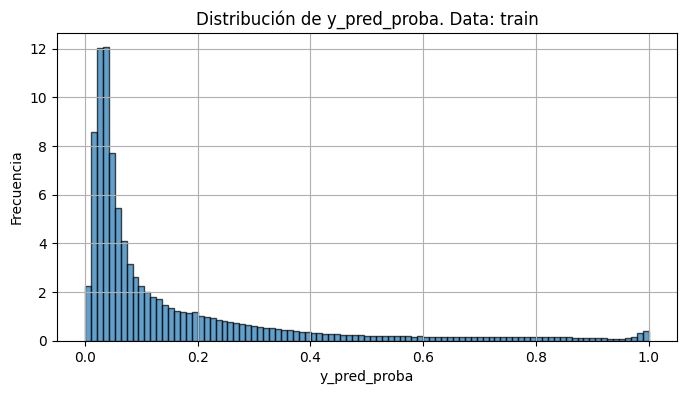

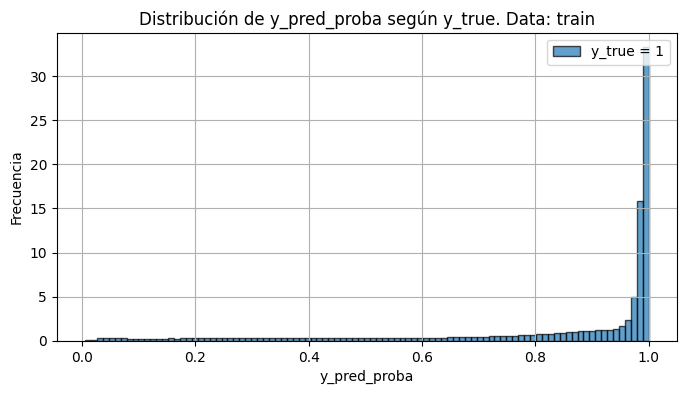

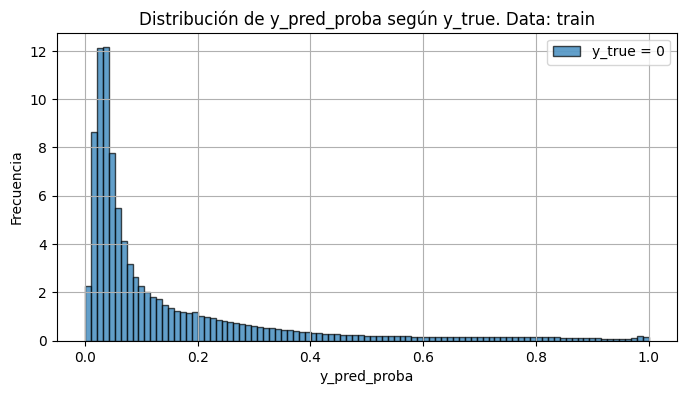

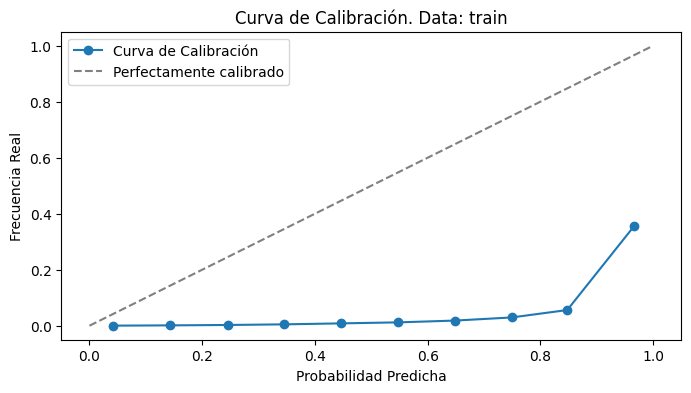

[01/30/25 17:00:16] INFO     TOP N: 1686627                                                           ]8;id=549705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/30/25 17:00:23] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=713071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=264194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=545747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=317338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=973805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=572057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=918576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=320387;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=672585;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=309551;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=988275;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=125384;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=602453;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=453481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=252204;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=495928;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=505936;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=867664;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=967975;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=82159;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=4321;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=94135;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=365704;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=206749;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=486087;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=280060;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=508262;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=812142;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=438088;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=366070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 17:00:24] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=377718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=327674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/30/25 17:00:25] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=763274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=845763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=661699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=601208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=535763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=816821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=211501;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=709363;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=464173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=228153;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=865978;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=564755;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=881844;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=755431;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=512834;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=967667;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=286353;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=229833;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=859223;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=561379;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=78124;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=922380;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=276732;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=393435;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=836389;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=927873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 17:00:31] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=30027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=955973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=345800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=442266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=93190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=11138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=220389;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=22455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=828175;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=561894;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=790432;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=871202;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=430285;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=754698;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=494253;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=436586;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=422000;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=948930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=435667;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=848121;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=389252;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=565278;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=708732;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=241807;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=820934;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=823689;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=880577;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=178461;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=247862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=776012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 17:00:33] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=482855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=831458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=434548;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=559780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87]            ]8;id=16797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=460249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=627491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=131129;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=733995;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=713065;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=748904;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=3120;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=329515;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=401423;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=658167;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=454093;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=754439;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=911773;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=345009;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=155139;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=298870;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=237568;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=849796;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=450999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=266797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 17:00:39] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=421788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=808656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=508689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=344086;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=53504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=990304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=628640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=482179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=815343;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=42660;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=907484;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=875350;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=527755;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=278468;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=340597;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=521956;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=919759;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=466187;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=253370;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=855665;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=404227;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=421355;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=287616;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=698007;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=544431;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=955796;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=695649;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=782144;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=873681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/30/25 17:00:42] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=223594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=109262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=941229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=949301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87]            ]8;id=829560;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=883607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=437876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=369776;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=18969;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=626087;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=31186;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=621082;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=56077;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=545955;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=829107;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=520559;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=784578;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=955414;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=946549;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=414888;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=853297;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=693178;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=44995;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=946317;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=880756;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=393906;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=865173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=773744;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=131694;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=48416;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=139302;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=957469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=343986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=510058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=417639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=727302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=825870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=966107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 17:00:49] INFO     Update probs: Selected: 0, Target Select: 1686627, Diff %: -1.0           ]8;id=365212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 17:00:50] INFO     Update probs: Selected: 59164, Target Select: 1686627, Diff %:            ]8;id=510481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=401539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649217046804065                                                                   

[01/30/25 17:00:51] INFO     Update probs: Selected: 118355, Target Select: 1686627, Diff %:           ]8;id=629889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=602979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298274010791954                                                                   

[01/30/25 17:00:52] INFO     Update probs: Selected: 177549, Target Select: 1686627, Diff %:           ]8;id=559055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947313187800267                                                                   

[01/30/25 17:00:53] INFO     Update probs: Selected: 236702, Target Select: 1686627, Diff %:           ]8;id=486581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=304256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596595453529441                                                                   

[01/30/25 17:00:54] INFO     Update probs: Selected: 295894, Target Select: 1686627, Diff %:           ]8;id=54894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245646488524138                                                                   

[01/30/25 17:00:55] INFO     Update probs: Selected: 355108, Target Select: 1686627, Diff %:           ]8;id=572058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894567085668616                                                                   

[01/30/25 17:00:56] INFO     Update probs: Selected: 414250, Target Select: 1686627, Diff %:           ]8;id=499025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=217660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543914570322899                                                                   

[01/30/25 17:00:57] INFO     Update probs: Selected: 473372, Target Select: 1686627, Diff %:           ]8;id=137241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=913182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193380634841017                                                                   

[01/30/25 17:00:58] INFO     Update probs: Selected: 532645, Target Select: 1686627, Diff %:           ]8;id=324260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=391399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841951421387182                                                                   

[01/30/25 17:00:59] INFO     Update probs: Selected: 591751, Target Select: 1686627, Diff %:           ]8;id=714470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=251543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491512349796369                                                                   

[01/30/25 17:01:00] INFO     Update probs: Selected: 650953, Target Select: 1686627, Diff %:           ]8;id=401154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=550053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140504094859148                                                                   

[01/30/25 17:01:01] INFO     Update probs: Selected: 710174, Target Select: 1686627, Diff %:           ]8;id=492882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=632397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789383189051284                                                                   

[01/30/25 17:01:02] INFO     Update probs: Selected: 769438, Target Select: 1686627, Diff %:           ]8;id=840608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=899997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438007336536176                                                                   

[01/30/25 17:01:03] INFO     Update probs: Selected: 828435, Target Select: 1686627, Diff %:           ]8;id=923884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=92808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088214525203261                                                                   

[01/30/25 17:01:04] INFO     Update probs: Selected: 887652, Target Select: 1686627, Diff %:           ]8;id=699649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737117335368164                                                                   

[01/30/25 17:01:05] INFO     Update probs: Selected: 946664, Target Select: 1686627, Diff %:           ]8;id=85982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=875150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4387235589137373                                                                   

[01/30/25 17:01:06] INFO     Update probs: Selected: 1006078, Target Select: 1686627, Diff %:          ]8;id=364661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=646863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034970387643504                                                                   

[01/30/25 17:01:07] INFO     Update probs: Selected: 1065148, Target Select: 1686627, Diff %:          ]8;id=614019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=339876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684744759807592                                                                   

[01/30/25 17:01:08] INFO     Update probs: Selected: 1124665, Target Select: 1686627, Diff %:          ]8;id=82526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3331868872014974                                                                   

[01/30/25 17:01:09] INFO     Update probs: Selected: 1183674, Target Select: 1686627, Diff %:          ]8;id=646311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=878931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2982004912763759                                                                   

[01/30/25 17:01:10] INFO     Update probs: Selected: 1301988, Target Select: 1686627, Diff %:          ]8;id=597425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=196246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22805220122765732                                                                  

[01/30/25 17:01:11] INFO     Update probs: Selected: 1361153, Target Select: 1686627, Diff %:          ]8;id=625871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19297331300874468                                                                  

[01/30/25 17:01:12] INFO     Update probs: Selected: 1420643, Target Select: 1686627, Diff %:          ]8;id=916880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15770173251110056                                                                  

[01/30/25 17:01:13] INFO     Update probs: Selected: 1479881, Target Select: 1686627, Diff %:          ]8;id=506467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=702487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12257956264188821                                                                  

[01/30/25 17:01:14] INFO     Update probs: Selected: 1597771, Target Select: 1686627, Diff %:          ]8;id=330303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=307344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052682661904499335                                                                 

[01/30/25 17:01:15] INFO     Update probs: Selected: 1656315, Target Select: 1686627, Diff %:          ]8;id=3895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017971964162793553                                                                 

[01/30/25 17:01:16] INFO     Update probs: Selected: 1686627, Target Select: 1686627, Diff %: 0.0      ]8;id=261803;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=487396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=301547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=119476;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=124593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=971289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=233434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=198367;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 17:01:17] INFO     Update probs: Selected: 0, Target Select: 1686627, Diff %: -1.0           ]8;id=125971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=990694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 17:01:18] INFO     Update probs: Selected: 59161, Target Select: 1686627, Diff %:            ]8;id=396244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=696315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649234833783641                                                                   

[01/30/25 17:01:19] INFO     Update probs: Selected: 118367, Target Select: 1686627, Diff %:           ]8;id=738310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=229703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298202862873652                                                                   

[01/30/25 17:01:20] INFO     Update probs: Selected: 177514, Target Select: 1686627, Diff %:           ]8;id=715874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=596908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947520702561977                                                                   

[01/30/25 17:01:21] INFO     Update probs: Selected: 236748, Target Select: 1686627, Diff %:           ]8;id=354174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=265871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596322719842621                                                                   

[01/30/25 17:01:22] INFO     Update probs: Selected: 295892, Target Select: 1686627, Diff %:           ]8;id=199300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=409684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.824565834651052                                                                    

[01/30/25 17:01:23] INFO     Update probs: Selected: 355046, Target Select: 1686627, Diff %:           ]8;id=218870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=24933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894934683246503                                                                   

[01/30/25 17:01:24] INFO     Update probs: Selected: 414307, Target Select: 1686627, Diff %:           ]8;id=821798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.754357661771097                                                                    

[01/30/25 17:01:25] INFO     Update probs: Selected: 473419, Target Select: 1686627, Diff %:           ]8;id=708464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=233878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193101972161006                                                                   

[01/30/25 17:01:26] INFO     Update probs: Selected: 532659, Target Select: 1686627, Diff %:           ]8;id=428341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=535337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841868415482498                                                                   

[01/30/25 17:01:27] INFO     Update probs: Selected: 591805, Target Select: 1686627, Diff %:           ]8;id=232305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=15246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491192184164015                                                                   

[01/30/25 17:01:28] INFO     Update probs: Selected: 650990, Target Select: 1686627, Diff %:           ]8;id=238168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=565940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140284722111053                                                                   

[01/30/25 17:01:29] INFO     Update probs: Selected: 710132, Target Select: 1686627, Diff %:           ]8;id=606684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=936637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789632206765337                                                                   

[01/30/25 17:01:30] INFO     Update probs: Selected: 769323, Target Select: 1686627, Diff %:           ]8;id=758909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=837486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438689170753225                                                                   

[01/30/25 17:01:31] INFO     Update probs: Selected: 828474, Target Select: 1686627, Diff %:           ]8;id=727493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087983294468783                                                                   

[01/30/25 17:01:32] INFO     Update probs: Selected: 887576, Target Select: 1686627, Diff %:           ]8;id=941032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=145991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737567938850736                                                                   

[01/30/25 17:01:33] INFO     Update probs: Selected: 947075, Target Select: 1686627, Diff %:           ]8;id=112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=396143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4384798772935569                                                                   

[01/30/25 17:01:34] INFO     Update probs: Selected: 1006291, Target Select: 1686627, Diff %:          ]8;id=870827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=375737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4033707512093664                                                                   

[01/30/25 17:01:35] INFO     Update probs: Selected: 1064965, Target Select: 1686627, Diff %:          ]8;id=983878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=487645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.368582976556168                                                                    

[01/30/25 17:01:36] INFO     Update probs: Selected: 1124650, Target Select: 1686627, Diff %:          ]8;id=888877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=204507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.333195780691285                                                                    

[01/30/25 17:01:37] INFO     Update probs: Selected: 1242523, Target Select: 1686627, Diff %:          ]8;id=74534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2633089592423221                                                                   

[01/30/25 17:01:38] INFO     Update probs: Selected: 1301822, Target Select: 1686627, Diff %:          ]8;id=466605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22815062251464016                                                                  

[01/30/25 17:01:39] INFO     Update probs: Selected: 1361352, Target Select: 1686627, Diff %:          ]8;id=331552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19285532604422911                                                                  

[01/30/25 17:01:40] INFO     Update probs: Selected: 1420693, Target Select: 1686627, Diff %:          ]8;id=224100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15767208754514186                                                                  

[01/30/25 17:01:41] INFO     Update probs: Selected: 1479869, Target Select: 1686627, Diff %:          ]8;id=906739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=783446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1225866774337183                                                                   

[01/30/25 17:01:42] INFO     Update probs: Selected: 1538455, Target Select: 1686627, Diff %:          ]8;id=402318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=517884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08785107792060723                                                                  

[01/30/25 17:01:43] INFO     Update probs: Selected: 1657205, Target Select: 1686627, Diff %:          ]8;id=176818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=896103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01744428376872895                                                                  

[01/30/25 17:01:44] INFO     Update probs: Selected: 1686627, Target Select: 1686627, Diff %: 0.0      ]8;id=57661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=268433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=546834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=67916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=383217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=278309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=545605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 17:01:49] INFO     Update probs: Selected: 0, Target Select: 1686627, Diff %: -1.0           ]8;id=558774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=929369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 17:01:50] INFO     Update probs: Selected: 59159, Target Select: 1686627, Diff %:            ]8;id=87886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=916442;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649246691770024                                                                   

[01/30/25 17:01:51] INFO     Update probs: Selected: 118351, Target Select: 1686627, Diff %:           ]8;id=199338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=518426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929829772676472                                                                    

[01/30/25 17:01:52] INFO     Update probs: Selected: 177539, Target Select: 1686627, Diff %:           ]8;id=328627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=209080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947372477732184                                                                   

[01/30/25 17:01:53] INFO     Update probs: Selected: 236739, Target Select: 1686627, Diff %:           ]8;id=927593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596376080781346                                                                   

[01/30/25 17:01:54] INFO     Update probs: Selected: 295911, Target Select: 1686627, Diff %:           ]8;id=534804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245545695639878                                                                   

[01/30/25 17:01:55] INFO     Update probs: Selected: 355035, Target Select: 1686627, Diff %:           ]8;id=470946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=329817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894999902171612                                                                   

[01/30/25 17:01:56] INFO     Update probs: Selected: 414234, Target Select: 1686627, Diff %:           ]8;id=299062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=26962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544009434213966                                                                   

[01/30/25 17:01:57] INFO     Update probs: Selected: 473451, Target Select: 1686627, Diff %:           ]8;id=135505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719291224437887                                                                    

[01/30/25 17:01:58] INFO     Update probs: Selected: 532663, Target Select: 1686627, Diff %:           ]8;id=383087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841844699509732                                                                   

[01/30/25 17:01:59] INFO     Update probs: Selected: 591734, Target Select: 1686627, Diff %:           ]8;id=955143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=579540;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491613142680628                                                                   

[01/30/25 17:02:00] INFO     Update probs: Selected: 710155, Target Select: 1686627, Diff %:           ]8;id=113399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=915060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789495839921927                                                                   

[01/30/25 17:02:01] INFO     Update probs: Selected: 769443, Target Select: 1686627, Diff %:           ]8;id=333020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=418794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437977691570217                                                                   

[01/30/25 17:02:02] INFO     Update probs: Selected: 828395, Target Select: 1686627, Diff %:           ]8;id=751677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=257570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.508845168493093                                                                    

[01/30/25 17:02:03] INFO     Update probs: Selected: 887762, Target Select: 1686627, Diff %:           ]8;id=49237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=50378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47364651461170726                                                                  

[01/30/25 17:02:04] INFO     Update probs: Selected: 946876, Target Select: 1686627, Diff %:           ]8;id=214333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=643833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43859786425807246                                                                  

[01/30/25 17:02:05] INFO     Update probs: Selected: 1006215, Target Select: 1686627, Diff %:          ]8;id=867973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40341581155762357                                                                  

[01/30/25 17:02:06] INFO     Update probs: Selected: 1065048, Target Select: 1686627, Diff %:          ]8;id=398322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=192212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3685337659126766                                                                   

[01/30/25 17:02:07] INFO     Update probs: Selected: 1124637, Target Select: 1686627, Diff %:          ]8;id=681945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3332034883824343                                                                   

[01/30/25 17:02:08] INFO     Update probs: Selected: 1183850, Target Select: 1686627, Diff %:          ]8;id=201281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=905890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2980961409962013                                                                   

[01/30/25 17:02:09] INFO     Update probs: Selected: 1242970, Target Select: 1686627, Diff %:          ]8;id=953690;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=312338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26304393324665143                                                                  

[01/30/25 17:02:10] INFO     Update probs: Selected: 1302000, Target Select: 1686627, Diff %:          ]8;id=563632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=682342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22804508643582724                                                                  

[01/30/25 17:02:11] INFO     Update probs: Selected: 1361193, Target Select: 1686627, Diff %:          ]8;id=655365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19294959703597772                                                                  

[01/30/25 17:02:12] INFO     Update probs: Selected: 1420130, Target Select: 1686627, Diff %:          ]8;id=798662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=115048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15800588986183667                                                                  

[01/30/25 17:02:13] INFO     Update probs: Selected: 1479516, Target Select: 1686627, Diff %:          ]8;id=692085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=963772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12279597089338662                                                                  

[01/30/25 17:02:14] INFO     Update probs: Selected: 1538790, Target Select: 1686627, Diff %:          ]8;id=556023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=177565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08765245664868403                                                                  

[01/30/25 17:02:15] INFO     Update probs: Selected: 1597526, Target Select: 1686627, Diff %:          ]8;id=696165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052827922237696896                                                                 

[01/30/25 17:02:16] INFO     Update probs: Selected: 1656807, Target Select: 1686627, Diff %:          ]8;id=622896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=649038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017680257697760087                                                                 

[01/30/25 17:02:17] INFO     Update probs: Selected: 1686627, Target Select: 1686627, Diff %: 0.0      ]8;id=358247;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=727904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=99843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=882319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=993926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=132831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=507449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 17:02:19] INFO     Update probs: Selected: 0, Target Select: 1686627, Diff %: -1.0           ]8;id=205199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=94456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 17:02:20] INFO     Update probs: Selected: 59168, Target Select: 1686627, Diff %:            ]8;id=273516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=698965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649193330831298                                                                   

[01/30/25 17:02:21] INFO     Update probs: Selected: 118368, Target Select: 1686627, Diff %:           ]8;id=721215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929819693388046                                                                    

[01/30/25 17:02:22] INFO     Update probs: Selected: 177554, Target Select: 1686627, Diff %:           ]8;id=368113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=5508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947283542834308                                                                   

[01/30/25 17:02:23] INFO     Update probs: Selected: 236755, Target Select: 1686627, Diff %:           ]8;id=571285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=646652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596281216890279                                                                   

                    INFO     Update probs: Selected: 295869, Target Select: 1686627, Diff %:           ]8;id=962546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=835544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245794713353931                                                                   

[01/30/25 17:02:24] INFO     Update probs: Selected: 355102, Target Select: 1686627, Diff %:           ]8;id=547434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894602659627766                                                                   

[01/30/25 17:02:25] INFO     Update probs: Selected: 414284, Target Select: 1686627, Diff %:           ]8;id=714563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543712984554379                                                                   

[01/30/25 17:02:26] INFO     Update probs: Selected: 473444, Target Select: 1686627, Diff %:           ]8;id=455325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192953747331212                                                                   

[01/30/25 17:02:27] INFO     Update probs: Selected: 532646, Target Select: 1686627, Diff %:           ]8;id=470947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=837453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841945492393992                                                                   

[01/30/25 17:02:28] INFO     Update probs: Selected: 591726, Target Select: 1686627, Diff %:           ]8;id=2547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491660574626162                                                                   

[01/30/25 17:02:29] INFO     Update probs: Selected: 651004, Target Select: 1686627, Diff %:           ]8;id=608544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140201716206369                                                                   

[01/30/25 17:02:30] INFO     Update probs: Selected: 710171, Target Select: 1686627, Diff %:           ]8;id=169291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.578940097603086                                                                    

[01/30/25 17:02:31] INFO     Update probs: Selected: 769208, Target Select: 1686627, Diff %:           ]8;id=2019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=741060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439371004970275                                                                   

[01/30/25 17:02:32] INFO     Update probs: Selected: 828479, Target Select: 1686627, Diff %:           ]8;id=523554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=124328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087953649502824                                                                   

[01/30/25 17:02:33] INFO     Update probs: Selected: 887673, Target Select: 1686627, Diff %:           ]8;id=445282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734130;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736992826511137                                                                   

[01/30/25 17:02:34] INFO     Update probs: Selected: 946944, Target Select: 1686627, Diff %:           ]8;id=183789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=811443;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385575471043687                                                                   

[01/30/25 17:02:35] INFO     Update probs: Selected: 1006065, Target Select: 1686627, Diff %:          ]8;id=474600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=514138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40350474645549966                                                                  

[01/30/25 17:02:36] INFO     Update probs: Selected: 1065340, Target Select: 1686627, Diff %:          ]8;id=326271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683606393114779                                                                   

[01/30/25 17:02:37] INFO     Update probs: Selected: 1124568, Target Select: 1686627, Diff %:          ]8;id=721649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=352175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3332443984354573                                                                   

[01/30/25 17:02:38] INFO     Update probs: Selected: 1183381, Target Select: 1686627, Diff %:          ]8;id=400104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=410229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29837421077689374                                                                  

[01/30/25 17:02:39] INFO     Update probs: Selected: 1243002, Target Select: 1686627, Diff %:          ]8;id=361506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2630249604684379                                                                   

[01/30/25 17:02:40] INFO     Update probs: Selected: 1302157, Target Select: 1686627, Diff %:          ]8;id=315292;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=825784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22795200124271697                                                                  

[01/30/25 17:02:41] INFO     Update probs: Selected: 1360946, Target Select: 1686627, Diff %:          ]8;id=679775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=798793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19309604316781362                                                                  

[01/30/25 17:02:42] INFO     Update probs: Selected: 1420545, Target Select: 1686627, Diff %:          ]8;id=514107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=835248;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1577598366443796                                                                   

[01/30/25 17:02:43] INFO     Update probs: Selected: 1479258, Target Select: 1686627, Diff %:          ]8;id=513676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=58733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12294893891773344                                                                  

[01/30/25 17:02:44] INFO     Update probs: Selected: 1538992, Target Select: 1686627, Diff %:          ]8;id=958340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08753269098621094                                                                  

[01/30/25 17:02:45] INFO     Update probs: Selected: 1597767, Target Select: 1686627, Diff %:          ]8;id=342822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=916384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05268503350177603                                                                  

[01/30/25 17:02:46] INFO     Update probs: Selected: 1657101, Target Select: 1686627, Diff %:          ]8;id=767002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=336036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017505945297923015                                                                 

[01/30/25 17:02:47] INFO     Update probs: Selected: 1686627, Target Select: 1686627, Diff %: 0.0      ]8;id=877332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=643454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=126607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=115767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_16,Run17. Weight: 1                                       ]8;id=790074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=317991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 17:02:53] INFO     Update probs: Selected: 0, Target Select: 1686627, Diff %: -1.0           ]8;id=99972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=759079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 59159, Target Select: 1686627, Diff %:            ]8;id=316183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=4388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649246691770024                                                                   

[01/30/25 17:02:54] INFO     Update probs: Selected: 118351, Target Select: 1686627, Diff %:           ]8;id=371119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=801142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929829772676472                                                                    

[01/30/25 17:02:55] INFO     Update probs: Selected: 177539, Target Select: 1686627, Diff %:           ]8;id=842348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947372477732184                                                                   

[01/30/25 17:02:56] INFO     Update probs: Selected: 236739, Target Select: 1686627, Diff %:           ]8;id=844982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596376080781346                                                                   

[01/30/25 17:02:57] INFO     Update probs: Selected: 295911, Target Select: 1686627, Diff %:           ]8;id=459088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=574726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245545695639878                                                                   

[01/30/25 17:02:58] INFO     Update probs: Selected: 355035, Target Select: 1686627, Diff %:           ]8;id=442643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894999902171612                                                                   

[01/30/25 17:02:59] INFO     Update probs: Selected: 414234, Target Select: 1686627, Diff %:           ]8;id=152650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=449321;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544009434213966                                                                   

[01/30/25 17:03:00] INFO     Update probs: Selected: 473451, Target Select: 1686627, Diff %:           ]8;id=969913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719291224437887                                                                    

[01/30/25 17:03:01] INFO     Update probs: Selected: 532663, Target Select: 1686627, Diff %:           ]8;id=962107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=552276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841844699509732                                                                   

[01/30/25 17:03:02] INFO     Update probs: Selected: 591734, Target Select: 1686627, Diff %:           ]8;id=792446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=4418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491613142680628                                                                   

[01/30/25 17:03:03] INFO     Update probs: Selected: 710155, Target Select: 1686627, Diff %:           ]8;id=291536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=351552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789495839921927                                                                   

[01/30/25 17:03:04] INFO     Update probs: Selected: 769443, Target Select: 1686627, Diff %:           ]8;id=70856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=495909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437977691570217                                                                   

[01/30/25 17:03:05] INFO     Update probs: Selected: 828395, Target Select: 1686627, Diff %:           ]8;id=441340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=296138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.508845168493093                                                                    

[01/30/25 17:03:06] INFO     Update probs: Selected: 887762, Target Select: 1686627, Diff %:           ]8;id=440946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=287065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47364651461170726                                                                  

[01/30/25 17:03:07] INFO     Update probs: Selected: 946876, Target Select: 1686627, Diff %:           ]8;id=118066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=898337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43859786425807246                                                                  

[01/30/25 17:03:08] INFO     Update probs: Selected: 1006215, Target Select: 1686627, Diff %:          ]8;id=259859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=747747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40341581155762357                                                                  

[01/30/25 17:03:09] INFO     Update probs: Selected: 1065048, Target Select: 1686627, Diff %:          ]8;id=811337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=612032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3685337659126766                                                                   

[01/30/25 17:03:10] INFO     Update probs: Selected: 1124637, Target Select: 1686627, Diff %:          ]8;id=128760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=222861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3332034883824343                                                                   

[01/30/25 17:03:11] INFO     Update probs: Selected: 1183850, Target Select: 1686627, Diff %:          ]8;id=397970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2980961409962013                                                                   

[01/30/25 17:03:12] INFO     Update probs: Selected: 1242970, Target Select: 1686627, Diff %:          ]8;id=165108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26304393324665143                                                                  

[01/30/25 17:03:13] INFO     Update probs: Selected: 1302000, Target Select: 1686627, Diff %:          ]8;id=327651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=314294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22804508643582724                                                                  

[01/30/25 17:03:14] INFO     Update probs: Selected: 1361193, Target Select: 1686627, Diff %:          ]8;id=541478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=485443;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19294959703597772                                                                  

[01/30/25 17:03:15] INFO     Update probs: Selected: 1420130, Target Select: 1686627, Diff %:          ]8;id=484555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=393158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15800588986183667                                                                  

[01/30/25 17:03:16] INFO     Update probs: Selected: 1479516, Target Select: 1686627, Diff %:          ]8;id=442840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=721790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12279597089338662                                                                  

                    INFO     Update probs: Selected: 1538790, Target Select: 1686627, Diff %:          ]8;id=9640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08765245664868403                                                                  

[01/30/25 17:03:17] INFO     Update probs: Selected: 1597526, Target Select: 1686627, Diff %:          ]8;id=531939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052827922237696896                                                                 

[01/30/25 17:03:18] INFO     Update probs: Selected: 1656807, Target Select: 1686627, Diff %:          ]8;id=828332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=549375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017680257697760087                                                                 

[01/30/25 17:03:19] INFO     Update probs: Selected: 1686627, Target Select: 1686627, Diff %: 0.0      ]8;id=758606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=686839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=737778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/30/25 17:03:20] INFO     ------------------------------------------------------                    ]8;id=400823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=223120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_19,Run20. Weight: 1                                       ]8;id=287255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=274316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/30/25 17:03:22] INFO     Update probs: Selected: 0, Target Select: 1686627, Diff %: -1.0           ]8;id=46359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=825311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/30/25 17:03:23] INFO     Update probs: Selected: 59167, Target Select: 1686627, Diff %:            ]8;id=531160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=259770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964919925982449                                                                    

[01/30/25 17:03:24] INFO     Update probs: Selected: 118388, Target Select: 1686627, Diff %:           ]8;id=578924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=138260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298078354016626                                                                   

[01/30/25 17:03:25] INFO     Update probs: Selected: 177544, Target Select: 1686627, Diff %:           ]8;id=236852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=971338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947342832766225                                                                   

[01/30/25 17:03:26] INFO     Update probs: Selected: 236702, Target Select: 1686627, Diff %:           ]8;id=118337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=217294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596595453529441                                                                   

[01/30/25 17:03:27] INFO     Update probs: Selected: 295857, Target Select: 1686627, Diff %:           ]8;id=198088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245865861272231                                                                   

                    INFO     Update probs: Selected: 355088, Target Select: 1686627, Diff %:           ]8;id=649801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=727236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.789468566553245                                                                    

[01/30/25 17:03:28] INFO     Update probs: Selected: 414272, Target Select: 1686627, Diff %:           ]8;id=539266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=730556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543784132472681                                                                   

[01/30/25 17:03:29] INFO     Update probs: Selected: 473482, Target Select: 1686627, Diff %:           ]8;id=795680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=667817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192728445589925                                                                   

[01/30/25 17:03:30] INFO     Update probs: Selected: 532578, Target Select: 1686627, Diff %:           ]8;id=673141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842348663931029                                                                   

[01/30/25 17:03:31] INFO     Update probs: Selected: 591722, Target Select: 1686627, Diff %:           ]8;id=119984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491684290598929                                                                   

[01/30/25 17:03:32] INFO     Update probs: Selected: 651016, Target Select: 1686627, Diff %:           ]8;id=773487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=598076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140130568288068                                                                   

[01/30/25 17:03:33] INFO     Update probs: Selected: 710062, Target Select: 1686627, Diff %:           ]8;id=197620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=967171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790047236288759                                                                   

[01/30/25 17:03:34] INFO     Update probs: Selected: 769426, Target Select: 1686627, Diff %:           ]8;id=710890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438078484454476                                                                   

[01/30/25 17:03:35] INFO     Update probs: Selected: 828466, Target Select: 1686627, Diff %:           ]8;id=330405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=140559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088030726414317                                                                   

[01/30/25 17:03:36] INFO     Update probs: Selected: 887596, Target Select: 1686627, Diff %:           ]8;id=547474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737449358986901                                                                   

[01/30/25 17:03:37] INFO     Update probs: Selected: 1006087, Target Select: 1686627, Diff %:          ]8;id=946683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40349170267047785                                                                  

[01/30/25 17:03:38] INFO     Update probs: Selected: 1065197, Target Select: 1686627, Diff %:          ]8;id=443143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684454239141197                                                                   

[01/30/25 17:03:39] INFO     Update probs: Selected: 1124529, Target Select: 1686627, Diff %:          ]8;id=245037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=993187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33326752150890504                                                                  

[01/30/25 17:03:40] INFO     Update probs: Selected: 1183371, Target Select: 1686627, Diff %:          ]8;id=740221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983801397700855                                                                   

[01/30/25 17:03:41] INFO     Update probs: Selected: 1242732, Target Select: 1686627, Diff %:          ]8;id=210872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=496482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631850432846148                                                                   

[01/30/25 17:03:42] INFO     Update probs: Selected: 1301936, Target Select: 1686627, Diff %:          ]8;id=728990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22808303199225435                                                                  

[01/30/25 17:03:43] INFO     Update probs: Selected: 1360862, Target Select: 1686627, Diff %:          ]8;id=45219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=157216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19314584671062424                                                                  

[01/30/25 17:03:44] INFO     Update probs: Selected: 1420546, Target Select: 1686627, Diff %:          ]8;id=432788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=501878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1577592437450604                                                                   

[01/30/25 17:03:45] INFO     Update probs: Selected: 1479312, Target Select: 1686627, Diff %:          ]8;id=656001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12291692235449805                                                                  

[01/30/25 17:03:46] INFO     Update probs: Selected: 1538926, Target Select: 1686627, Diff %:          ]8;id=233148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=806830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0875718223412764                                                                   

[01/30/25 17:03:47] INFO     Update probs: Selected: 1656996, Target Select: 1686627, Diff %:          ]8;id=826647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=311899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017568199726436255                                                                 

[01/30/25 17:03:48] INFO     Update probs: Selected: 1686627, Target Select: 1686627, Diff %: 0.0      ]8;id=504047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=726096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=574497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=281313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/30/25 17:03:49] INFO     Iniciando sistema de votaciones..                                         ]8;id=563618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=308556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/30/25 17:03:50] INFO     Ok Sistema de votaciones                                                  ]8;id=875868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=90694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

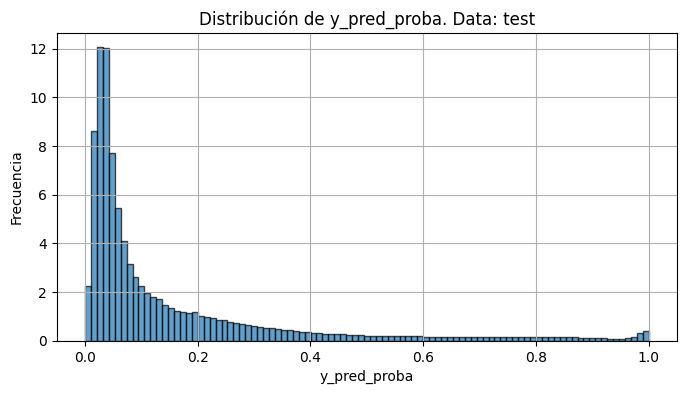

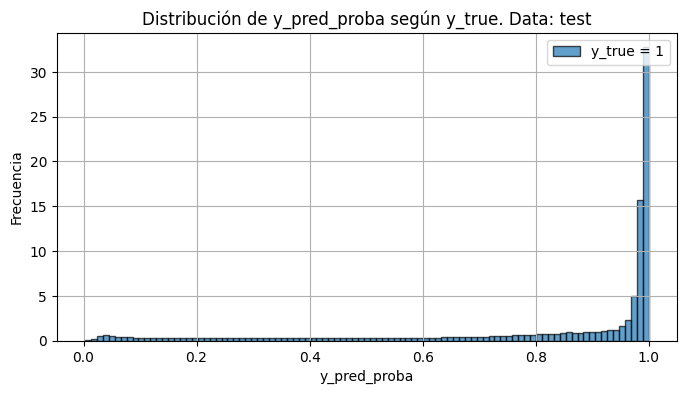

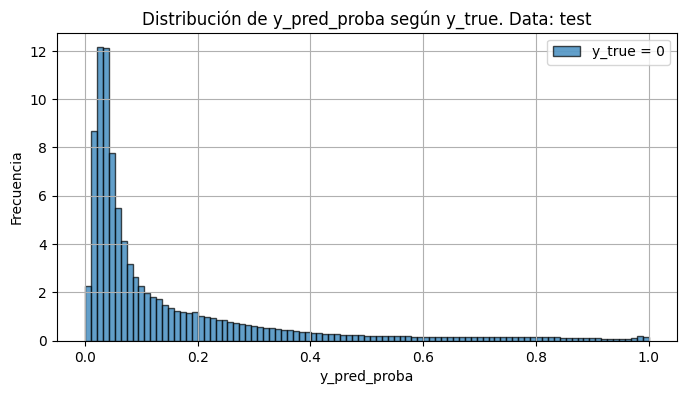

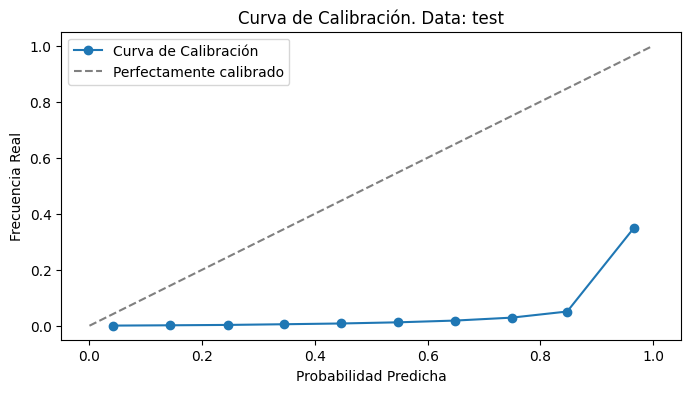

value            name_model  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.9556  [0, 1, 4, 7, 16, 19]   
           true_sum n_top test           42853  [0, 1, 4, 7, 16, 19]   
           backtest       test          2.5408  [0, 1, 4, 7, 16, 19]   

                                       model_name       select_model  
class_name metric_name    dataset_name                                
1          f1-score n_top test           Ensamble  modelo_produccion  
           true_sum n_top test           Ensamble  modelo_produccion  
           backtest       test           Ensamble  modelo_produccion

In [ ]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

In [ ]:
# mix
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest'])].reset_index() 
check_df_cientifico = check_df_cientifico.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_cientifico

metric_name  \
select_model        name_model           dataset_name class_name               
best_fitting_model  Run18                test         1             backtest   
                                         train        1             backtest   
best_model_name     Run13                test         1             backtest   
                                         train        1             backtest   
best_unbiased_model Run13                test         1             backtest   
                                         train        1             backtest   
modelo_produccion   [0, 1, 4, 7, 16, 19] test         1             backtest   
                                         train        1             backtest   

                                                                   value  \
select_model        name_model           dataset_name class_name           
best_fitting_model  Run18                test         1           2.5276   
                                         train        1           2.5338   
best_model_name     Run13                test         1           2.5345   
                                         train        1           2.5401   
best_unbiased_model Run13                test         1           2.5345   
                                         train        1           2.5401   
modelo_produccion   [0, 1, 4, 7, 16, 19] test         1           2.5408   
                                         train        1           2.5659   

                                                                        model_name  
select_model        name_model           dataset_name class_name                    
best_fitting_model  Run18                test         1           random_forest_17  
                                         train        1           random_forest_17  
best_model_name     Run13                test         1                     MLP_12  
                                         train        1                     MLP_12  
best_unbiased_model Run13                test         1                     MLP_12  
                                         train        1                     MLP_12  
modelo_produccion   [0, 1, 4, 7, 16, 19] test         1                   Ensamble  
                                         train        1                   Ensamble

In [ ]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

,prob_min,prob_max,tasa_aperturas
0,93.15,100.00,43.59
1,82.23,93.15,8.91
2,73.51,82.23,4.37
3,64.92,73.51,2.88
4,57.24,64.92,2.08


,prob_min,prob_max,tasa_aperturas
0,93.14,100.00,43.65
1,82.25,93.14,8.62
2,73.52,82.25,4.32
3,64.99,73.52,2.88
4,57.28,64.99,2.09


# optimizar ensamblado

In [ ]:
train = info_save2['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test = info_save2['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

(5622093, 7)

In [55]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [77]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = True

In [76]:
mejor_test_dado_mejores_train = False
ignore_train = True
first_loop = True

In [78]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')        
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')
    if first_loop == True:
        break
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")
epochs.shape

N TOP 4497673 .EMPEZAMOS:  Train Data


[01/30/25 17:19:17] INFO     Numero de iteraciones: 665. Train Data                                ]8;id=817473;file:///tmp/ipykernel_2481/3713006134.py\3713006134.py]8;;\:]8;id=361426;file:///tmp/ipykernel_2481/3713006134.py#42\42]8;;\

[01/30/25 17:24:51] INFO     TP: 170236.0. True: 179726.0. Tasa de Exito: 3.785%. Usando 0.2       ]8;id=919133;file:///tmp/ipykernel_2481/3713006134.py\3713006134.py]8;;\:]8;id=894764;file:///tmp/ipykernel_2481/3713006134.py#61\61]8;;\
                             deciles para Train Data                                                               

                    INFO     Numero de Iteraciones Finales: 1. Train Data                          ]8;id=460107;file:///tmp/ipykernel_2481/3713006134.py\3713006134.py]8;;\:]8;id=439634;file:///tmp/ipykernel_2481/3713006134.py#63\63]8;;\

------------------------


                    INFO     Hrs: 0. Min 5.578512779871622                                         ]8;id=980564;file:///tmp/ipykernel_2481/3713006134.py\3713006134.py]8;;\:]8;id=578949;file:///tmp/ipykernel_2481/3713006134.py#74\74]8;;\

(665, 1)

In [79]:
print(mejor_test_dado_mejores_train)
print(ignore_train)
print(first_loop)

True
False
True


In [80]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Unico


,Run1,Run2,Run5,Run8,Run17,Run20
1,0,0,0,0,0,1


% TP en n_filt_obs de los modelos individuales o unicos ejecutados


,Valor
Iteracion,
1,3.7837
9,3.7777
81,3.7509
27,3.7416
3,3.7416
243,3.7086


Cominaciones e ietraciones de modelos unicos


,Run1,Run2,Run5,Run8,Run17,Run20
243,1,0,0,0,0,0
81,0,1,0,0,0,0
27,0,0,1,0,0,0
9,0,0,0,1,0,0
3,0,0,0,0,1,0
1,0,0,0,0,0,1


Decil 1:  (1, 7.1689)
Decil 2:  (1, 3.7837)
Decil 3:  (1, 2.5801)


In [81]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Iteraciones


,Run1,Run2,Run5,Run8,Run17,Run20
11,0,0,0,1,0,2


% TP en n_filt_obs de los modelos individuales o unicos ejecutados


,Valor
Iteracion,
11,3.7850
10,3.7840
1,3.7837
19,3.7832
101,3.7794


Decil 1:  (11, 7.173)
Decil 2:  (11, 3.785)
Decil 3:  (11, 2.5805)


In [82]:
iterr = [373,397,349,424,478] # test best in test
iterr2 = iterr   # test best in train
iterr3 = [11,10,1,19,101] # train best in test
iterr4 = iterr3 # train best in train

In [83]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2+iterr3+iterr4))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3,0.5])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

Iteracion:  [1, 101, 424, 10, 11, 397, 19, 373, 349, 478]
Calling:  [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]


<Axes: ylabel='Iteraccion'>

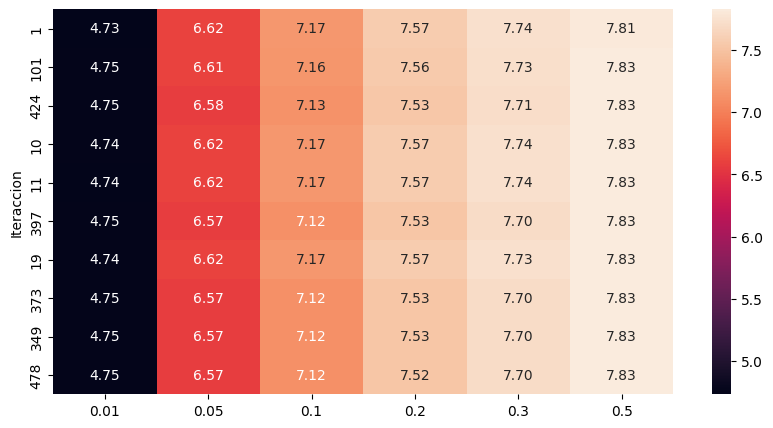

In [84]:
# mix train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

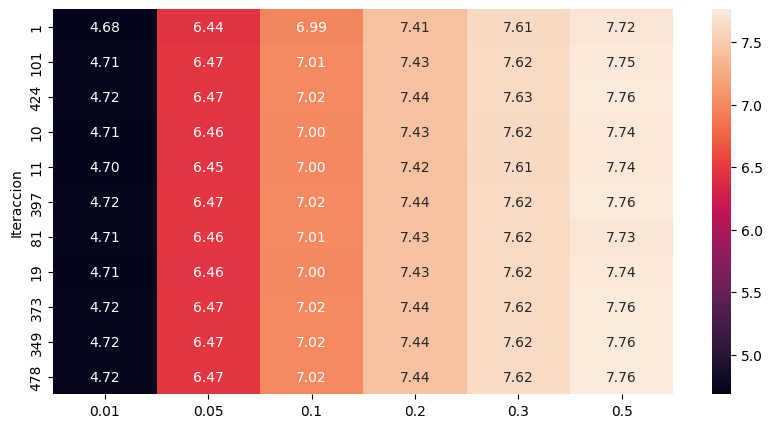

In [75]:
# mix test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

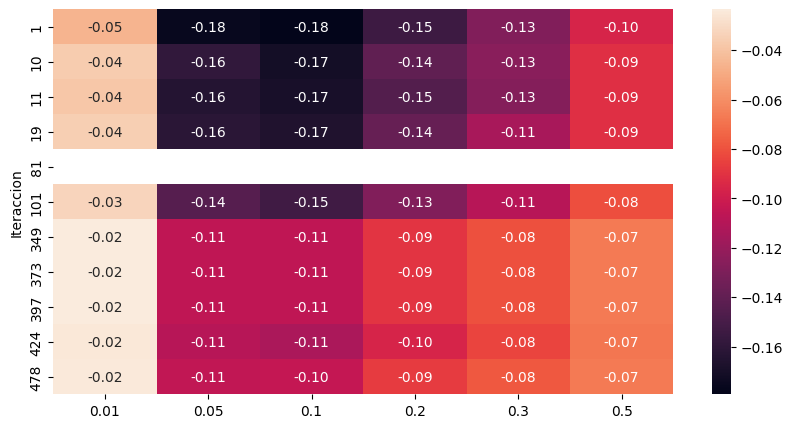

In [85]:
# mix test-train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test -summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

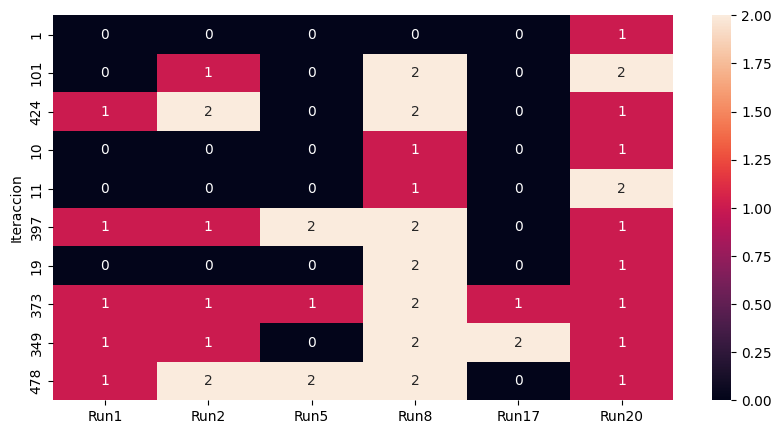

In [86]:
# mix distribucion de probabilidad
plt.figure(figsize = (10,5)) 
sns.heatmap(combinaciones.loc[summary.index],annot=True)
# modelos efectivos: 424,397,373,349,478
# modelo mejorcito 478
# modelo con un ligero mas de overfitting: 424

In [87]:
# ensamble sin optimizar
check_df_cientifico

metric_name  \
select_model        name_model           dataset_name class_name               
best_fitting_model  Run18                test         1             backtest   
                                         train        1             backtest   
best_model_name     Run13                test         1             backtest   
                                         train        1             backtest   
best_unbiased_model Run13                test         1             backtest   
                                         train        1             backtest   
modelo_produccion   [0, 1, 4, 7, 16, 19] test         1             backtest   
                                         train        1             backtest   

                                                                   value  \
select_model        name_model           dataset_name class_name           
best_fitting_model  Run18                test         1           2.5276   
                                         train        1           2.5338   
best_model_name     Run13                test         1           2.5345   
                                         train        1           2.5401   
best_unbiased_model Run13                test         1           2.5345   
                                         train        1           2.5401   
modelo_produccion   [0, 1, 4, 7, 16, 19] test         1           2.5408   
                                         train        1           2.5659   

                                                                        model_name  
select_model        name_model           dataset_name class_name                    
best_fitting_model  Run18                test         1           random_forest_17  
                                         train        1           random_forest_17  
best_model_name     Run13                test         1                     MLP_12  
                                         train        1                     MLP_12  
best_unbiased_model Run13                test         1                     MLP_12  
                                         train        1                     MLP_12  
modelo_produccion   [0, 1, 4, 7, 16, 19] test         1                   Ensamble  
                                         train        1                   Ensamble

## Resultados del model Selection

In [16]:
info_save_select_ensamble = catalog.load("info_save_select_experimento_1_y_2") # model_selection del mix del experimento1 y experimento2
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

Run_name:  [0, 1, 4, 7, 19]
W:  [1, 2, 2, 2, 1]


value  \
metric_name     dataset_name class_name select_model        name_model                 
Precision n_top test         1          best_fitting_model  Run18             2.5276   
                                        best_model_name     Run13             2.5345   
                                        best_unbiased_model Run13             2.5345   
                                        modelo_produccion   [0, 1, 4, 7, 19]  2.5415   
                train        1          best_fitting_model  Run18             2.5338   
                                        best_model_name     Run13             2.5401   
                                        best_unbiased_model Run13             2.5401   
                                        modelo_produccion   [0, 1, 4, 7, 19]  2.5674   
backtest        test         1          best_fitting_model  Run18             2.5276   
                                        best_model_name     Run13             2.5345   
                                        best_unbiased_model Run13             2.5345   
                                        modelo_produccion   [0, 1, 4, 7, 19]  2.5415   
                train        1          best_fitting_model  Run18             2.5338   
                                        best_model_name     Run13             2.5401   
                                        best_unbiased_model Run13             2.5401   
                                        modelo_produccion   [0, 1, 4, 7, 19]  2.5674   
f1-score n_top  test         1          best_fitting_model  Run18             4.9306   
                                        best_model_name     Run13             4.9436   
                                        best_unbiased_model Run13             4.9436   
                                        modelo_produccion   [0, 1, 4, 7, 19]  4.9569   
                train        1          best_fitting_model  Run18             4.9424   
                                        best_model_name     Run13             4.9544   
                                        best_unbiased_model Run13             4.9544   
                                        modelo_produccion   [0, 1, 4, 7, 19]  5.0063   
recall n_top    test         1          best_fitting_model  Run18              100.0   
                                        best_model_name     Run13              100.0   
                                        best_unbiased_model Run13              100.0   
                                        modelo_produccion   [0, 1, 4, 7, 19]   100.0   
                train        1          best_fitting_model  Run18              100.0   
                                        best_model_name     Run13              100.0   
                                        best_unbiased_model Run13              100.0   
                                        modelo_produccion   [0, 1, 4, 7, 19]   100.0   

                                                                                    model_name  
metric_name     dataset_name class_name select_model        name_model                          
Precision n_top test         1          best_fitting_model  Run18             random_forest_17  
                                        best_model_name     Run13                       MLP_12  
                                        best_unbiased_model Run13                       MLP_12  
                                        modelo_produccion   [0, 1, 4, 7, 19]          Ensamble  
                train        1          best_fitting_model  Run18             random_forest_17  
                                        best_model_name     Run13                       MLP_12  
                                        best_unbiased_model Run13                       MLP_12  
                                        modelo_produccion   [0, 1, 4, 7, 19]          Ensamble  
backtest        test         1          best_fitting_model  Run18             random_forest_17  
                   

In [14]:
try:
    display(info_save_select_ensamble["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select_ensamble["modelo_produccion"]['ks_test'])
    display(info_save_select_ensamble["modelo_produccion"]['ks_train'])
except:
    display(info_save_select_ensamble[info_save_select_ensamble["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

,REINDEX,ocupacion
llave,,
0,ocupacion_comerciante,empleado_privado
1,ocupacion_desempleado,pensionado
2,ocupacion_empleado_entidad,empleado_publico
3,ocupacion_empleado_privado,independiente
4,ocupacion_empleado_publico,estudiante
5,ocupacion_estudiante,rentista_de_capital
6,ocupacion_fuerzas_militares,hogar
7,ocupacion_hogar,fuerzas_militares
8,ocupacion_independiente,desempleado


In [15]:
print(info_save_select_ensamble["modelo_produccion"]["model_name"])
print(info_save_select_ensamble["modelo_produccion"]["name_model"])
if info_save_select_ensamble["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select_ensamble["modelo_produccion"]["nodos_select"])
    print(info_save_select_ensamble["modelo_produccion"]["weights"])

Ensamble

[0, 1, 4, 7, 19]
[1, 2, 2, 2, 1]
